In [1]:
import pandas as pd
import time
import os 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor,GradientBoostingRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.inspection import plot_partial_dependence, partial_dependence
import graphviz
from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn.linear_model import LinearRegression,ElasticNet,Ridge, RidgeCV
from sklearn.svm import SVR
from sklearn.feature_selection import RFE, RFECV,SelectFromModel
import eli5
from eli5.sklearn import PermutationImportance
pd.set_option('display.max_columns', None)


In [2]:
os.getcwd()
os.chdir("/Users/bvelasq6/Box Sync/CEE Educational Analytics/ATOG Analysis")
os.getcwd()
df = pd.read_csv("Data/clean_file.csv",low_memory=False)

In [3]:
df.describe()

,PIDM,TERM,CRAP,CRAPOLD,HSCODE,LSTYPE,ATOG,ATOGA,ATOGB,ATOGC,ATOGD,ATOGE,ATOGF,ATOGG,HON10,HON11,HON12,SCHINDEX,MILITARY,AGE,DEAD,LANG,INCOMEP,INCOMES,FAMSIZEP,FAMSIZES,EDFATHER,EDMOTHER,HOMELOC,UNITSQ,UNITSS,SATRT,SATRM,SATRV,SATRVC,SATRW,SATRR,SATS1,SATS2,SATS3,SATS3C,ACTCON,ACTCOM,ACTE,ACTM,ACTR,ACTS,ACTW,APTAKEN,APPASSED,APCREDIT,IBCREDIT,ALCREDIT,UCCREDIT,CCCREDIT,OCCREDIT,TAG,TAGSCHCODE,TAGSCHDESC,LSCODE,RL,GPA,CARES,OUTSTATE,INTERN,ELC,ENROLLED,LOWINCOME,FG,API,TRIBAL_MEMBER,ELCPERCENT,EAP,APP,SIRYES,SATNRW,SAT_SOSW,SAT_SOSM,SAT_SOSR,SAT_SRSW,SAT_SRSM,SAT_SRSR,GPAC,GPAR,GPAT,UNWEIGHTED_GPA,SAT_TOTAL_OFFICIAL,SATM_SECTION_OFFICIAL,SAT_WR_SECTION_OFFICIAL,SAT_OR_ACT_OFFICIAL,SATRM_OFFICIAL,SATRW_OFFICIAL,SATRR_OFFICIAL,ans1_grade_pt,ant2_grade_pt,bis2a_grade_pt,bis2b_grade_pt,chem2a_grade_pt,chem2b_grade_pt,enl3_grade_pt,his17_grade_pt,mat16a_grade_pt,mat21a_grade_pt,mat21b_grade_pt,phy7a_grade_pt,psc1_grade_pt,sta13_grade_pt,sta100_grade_pt,ans1_units,ant2_units,bis2a_units,bis2b_units,chem2a_units,chem2b_units,enl3_units,his17_units,mat16a_units,mat21a_units,mat21b_units,phy7a_units,psc1_units,sta13_units,sta100_units,IS_URM,FIRST_TERM_GPA,FIRST_TERM_MAJOR_2,FIRST_TERM_MAJOR_3,ANY_FIRST_TERM_MAJOR_IS_STEM,NUM_MAJOR_CHANGES,NUM_WLD_MAT_RMED,NUM_WLD_MAT_PREP,NUM_WLD_MAT_CONC,NUM_WLD_CHE_PREP,NUM_WLD_CHE_CONC,NUM_WLD_PHY_PREP,NUM_WLD_PHY_CONC,NUM_WLD_ENGLISH,NUM_STEM_CRSE,STARTED_INTERNATIONAL,FIRST_GENERATION,LOW_INCOME,TRIPLE,NO_TRIPLE,NUM_TERM_NOT_GS,FIRST_TERM_NOT_GS,AP_Bio,AP_CS,AP_Chemistry,AP_Calculus_AB,AP_Calculus_BC,AP_Physics_1,AP_Physics_2,AP_Physics_B,AP_Physics_C_EM,AP_Physics_C_Mech,AP_Stats,PEOPLE_MEAN,PLACE_MEAN,AP_Bio_bool,AP_CS_bool,AP_Chemistry_bool,AP_Calculus_AB_bool,AP_Calculus_BC_bool,AP_Physics_1_bool,AP_Physics_2_bool,AP_Physics_B_bool,AP_Physics_C_EM_bool,AP_Physics_C_Mech_bool,AP_Stats_bool,SEX_F,SEX_M,SEX_N,SAT_TOTAL_OFFICIAL_SQ
count,1.812000e+04,18120.000000,0.0,0.0,18111.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18117.000000,110.000000,18120.000000,0.0,18120.000000,17170.000000,223.000000,17821.00000,238.000000,16641.000000,17453.000000,18120.000000,0.0,0.0,18100.000000,14556.000000,0.0,0.0,4322.000000,4322.000000,5818.000000,4225.000000,0.0,0.0,8867.000000,8868.000000,8871.000000,8869.000000,8869.000000,8869.000000,7317.000000,14208.000000,14208.000000,14208.000000,659.000000,1.0,114.000000,5298.000000,712.000000,0.0,0.0,0.0,18120.000000,0.0,18120.000000,18120.0,18120.0,18120.0,18120.000000,18120.0,17169.000000,17822.000000,16275.000000,45.000000,11060.000000,0.0,2547.0,18120.0,9013.000000,11458.000000,11458.000000,11458.000000,11241.000000,11241.000000,11241.000000,18074.000000,85.000000,0.0,18074.000000,12241.000000,12241.000000,12241.000000,18086.000000,12241.000000,12241.000000,12241.000000,1131.000000,3571.000000,6638.000000,6650.000000,10052.000000,7671.000000,4642.000000,560.000000,2884.000000,3557.000000,4182.000000,2839.000000,4439.000000,4145.000000,3120.000000,1135.0,4030.000000,7480.0,7511.0,10147.0,8685.0,5025.0,696.0,3068.0,3654.0,4462.0,3178.0,4826.0,4944.0,3534.0,17823.000000,18067.000000,0.0,0.0,18071.000000,0.0,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18071.000000,17822.000000,17169.000000,16757.000000,7929.000000,18120.000000,3950.000000,4509.000000,649.000000,2056.000000,5246.000000,2623.000000,1092.000000,228.000000,24.000000,111.000000,495.000000,2767.000000,17924.000000,17846.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,18120.000000,1.224100e+04
mean,3.274229e+06,201763.960982,NaN,NaN,56562.636685,1.082892,48.025392,6.279801,8.198510,10.537748,8.001876,6.596965,4.379305,4.266336,2.379095,6.188907,6.259117,5711.671414,7.454545,17.964845,NaN,1.7381

Some imputation below: For indicators fill with 0s, for people and place mean fill with the mean.

In [4]:

values = {'AP_Bio':0,
 'AP_CS':0,
 'AP_Chemistry':0,
 'AP_Calculus_AB':0,
 'AP_Calculus_BC':0,
 'AP_Physics_1':0,
 'AP_Physics_2':0,
 'AP_Physics_B':0,
 'AP_Physics_C_EM':0,
 'AP_Physics_C_Mech':0,
 'AP_Stats':0,
 'EDFATHER':0,
 'EDMOTHER':0}
df = df.fillna(value=values)

df['PEOPLE_MEAN'].fillna(df['PEOPLE_MEAN'].mean(), inplace=True)
df['PLACE_MEAN'].fillna(df['PLACE_MEAN'].mean(), inplace=True)




In [5]:
pd.crosstab(index=df['INTERN'],columns=df['OUTSTATE'])

ETH,AF,AI,CH,EI,FP,JA,KO,LA,MX,OA,PI,VT,WH
mat21a_units,,,,,,,,,,,,,
4.0,122,15,597,260,259,51,68,165,795,122,19,263,859


In [6]:
df = pd.get_dummies(df,columns=['AP_Bio']) 
df = pd.get_dummies(df,columns=['AP_CS']) 
df = pd.get_dummies(df,columns =['AP_Chemistry'])
df = pd.get_dummies(df,columns = [ 'AP_Calculus_AB'])
df = pd.get_dummies(df,columns = ['AP_Calculus_BC'])
df = pd.get_dummies(df,columns = ['AP_Physics_1']) 
df = pd.get_dummies(df,columns=['AP_Physics_2'])
df = pd.get_dummies(df,columns =['AP_Physics_B'])
df = pd.get_dummies(df, columns = ['AP_Physics_C_EM']) 
df = pd.get_dummies(df, columns =['AP_Physics_C_Mech'])
df = pd.get_dummies(df,columns=['AP_Stats'])
df = pd.get_dummies(df,columns=['EDFATHER'])
df = pd.get_dummies(df,columns=['EDMOTHER'])
df = pd.get_dummies(df, columns=['LANG'])

In [7]:
df.to_csv("Data/clean_file_acorba.csv",index=False) 

In [8]:
df = pd.get_dummies(df, columns=['ETH'])

In [9]:
#df['SAT_TOTAL_SQUARE_NORM'] = (df[''SAT_TOTAL_OFFICIAL_SQ''] - df['SAT_TOTAL_OFFICIAL_SQ'].mean()) / (df.max() - df.min())

In [10]:
#df.columns.get_values()

In [11]:
controls = ['ATOG',
            'ATOGA',
            'ATOGB',
            'ATOGC',
            'ATOGD',
            'ATOGE',
            'ATOGF',
            'ATOGG',
            'APPASSED',
            'GPA',
            #'UNWEIGHTED_GPA',
           # 'LOWINCOME',
#             'EDFATHER',
#             'EDMOTHER',
            'CCCREDIT',
            'SAT_TOTAL_OFFICIAL_SQ',
            #'IS_URM',
            #'ANY_FIRST_TERM_MAJOR_IS_STEM',
            'FIRST_GENERATION',
            'LOW_INCOME',
            'TRIPLE',
            #             'AP_Bio_bool',
            #             'AP_CS_bool',
            #             'AP_Chemistry_bool',
            #             'AP_Calculus_AB_bool',
            #             'AP_Calculus_BC_bool',
            #             'AP_Physics_bool',
            #             'AP_Stats_bool',
            'SEX_F', 
            'ETH_AF',
            'ETH_AI', 
            'ETH_CH', 
            'ETH_EI',
            'ETH_FP',
            'ETH_JA', 
            'ETH_KO',
            'ETH_LA',
            'ETH_MX', 
            'ETH_OA', 
            'ETH_PI', 
            'ETH_VT', 
            'ETH_WH',
            'AP_Bio_0.0',
            'AP_Bio_3.0', 
            'AP_Bio_4.0',
            'AP_Bio_5.0',
            'AP_CS_0.0', 
            'AP_CS_3.0', 
            'AP_CS_4.0', 
            'AP_CS_5.0',
            'AP_Chemistry_0.0',
            'AP_Chemistry_3.0',
            'AP_Chemistry_4.0',
            'AP_Chemistry_5.0', 
            'AP_Calculus_AB_0.0', 
            'AP_Calculus_AB_3.0',
            'AP_Calculus_AB_4.0', 
            'AP_Calculus_AB_5.0',
            'AP_Calculus_BC_0.0',
            'AP_Calculus_BC_3.0', 
            'AP_Calculus_BC_4.0', 
            'AP_Calculus_BC_5.0',
            'AP_Physics_1_0.0', 
            'AP_Physics_1_3.0',
            'AP_Physics_1_4.0',
            'AP_Physics_1_5.0', 
            'AP_Physics_2_0.0',
            'AP_Physics_2_3.0',
            'AP_Physics_2_4.0',
            'AP_Physics_2_5.0',
            'AP_Physics_B_0.0',
            'AP_Physics_B_3.0',
            'AP_Physics_B_4.0', 
            'AP_Physics_B_5.0',
            'AP_Physics_C_EM_0.0',
            'AP_Physics_C_EM_3.0',
            'AP_Physics_C_EM_4.0',
            'AP_Physics_C_EM_5.0',
            'AP_Physics_C_Mech_0.0',
            'AP_Physics_C_Mech_3.0',
            'AP_Physics_C_Mech_4.0',
            'AP_Physics_C_Mech_5.0', 
            'AP_Stats_0.0',
            'AP_Stats_3.0', 
            'AP_Stats_4.0', 
            'AP_Stats_5.0',
            'EDFATHER_0.0',
            'EDFATHER_1.0', 
            'EDFATHER_2.0', 
            'EDFATHER_3.0', 
            'EDFATHER_5.0',
            'EDFATHER_6.0', 
            'EDFATHER_7.0', 
            'EDFATHER_8.0',
            'EDMOTHER_0.0',
            'EDMOTHER_1.0', 
            'EDMOTHER_2.0', 
            'EDMOTHER_3.0', 
            'EDMOTHER_5.0',
            'EDMOTHER_6.0',
            'EDMOTHER_7.0', 
            'EDMOTHER_8.0',
           'PEOPLE_MEAN',
           'PLACE_MEAN']

In [12]:
df[controls].isna().sum()

ATOG                         0
ATOGA                        0
ATOGB                        0
ATOGC                        0
ATOGD                        0
ATOGE                        0
ATOGF                        0
ATOGG                        0
APPASSED                  3912
GPA                          0
CCCREDIT                 12822
SAT_TOTAL_OFFICIAL_SQ     5879
FIRST_GENERATION           298
LOW_INCOME                 951
TRIPLE                    1363
SEX_F                        0
ETH_AF                       0
ETH_AI                       0
ETH_CH                       0
ETH_EI                       0
ETH_FP                       0
ETH_JA                       0
ETH_KO                       0
ETH_LA                       0
ETH_MX                       0
ETH_OA                       0
ETH_PI                       0
ETH_VT                       0
ETH_WH                       0
AP_Bio_0.0                   0
                         ...  
AP_Physics_C_EM_0.0          0
AP_Physi

In [13]:
# df = df[df['ATOG'].notna()]
# df = df[df['UNWEIGHTED_GPA'].notna()]

In [14]:
# # 'ans1_units', 
# # 'ant2_units', 
# # 'bis2a_units',
# # 'bis2b_units',
# # 'chem2a_units',
# # 'chem2b_units', 
# # 'enl3_units',
# # 'his17_units',
# # 'mat16a_units',
# # 'mat21a_units', 
# # 'mat21b_units', 
# # 'phy7a_units',
# # 'psc1_units',
# # 'sta13_units',
# # 'sta100_units',
# print(pd.crosstab(index=df['mat21a_units'],columns=df['ETH']))
# print(pd.crosstab(index=df['mat21b_units'],columns=df['ETH']))
# print(pd.crosstab(index=df['bis2a_units'],columns=df['ETH']))
# print(pd.crosstab(index=df['bis2b_units'],columns=df['ETH']))
# print(pd.crosstab(index=df['chem2a_units'],columns=df['ETH']))
# print(pd.crosstab(index=df['chem2b_units'],columns=df['ETH']))
# print(pd.crosstab(index=df['enl3_units'],columns=df['ETH']))
# print(pd.crosstab(index=df['his17_units'],columns=df['ETH']))
# print(pd.crosstab(index=df['mat16a_units'],columns=df['ETH']))
# print(pd.crosstab(index=df['phy7a_units'],columns=df['ETH']))
# print(pd.crosstab(index=df['psc1_units'],columns=df['ETH']))
# print(pd.crosstab(index=df['sta13_units'],columns=df['ETH']))
# print(pd.crosstab(index=df['sta100_units'],columns=df['ETH']))


The function below splits the test and training set, and imputes data. 
For imputation, I'm setting the NAs to 0, since that make sense for the controls. 

In [15]:
# Function below is to drop select the targe and control variables....
def data_proc(df,controls,target):
# args: df- data frame with the full data set of interest
    # controls - the set of control variables in the data frame...
    # target - a string which is the name of the variable we are interested in
### Return: Returns four data frames: two for training data and two for testing data...
    X = pd.concat([df[controls], df[target]], axis=1)
    X = X[X[target].notna()]
    X = X.fillna(0)   
    #Define target...
    y = X[target]
    X = X[controls]
#Next create test and training sets...
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    return X_train, X_test, y_train,y_test 

In [16]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_list = ['Linear Regression', 'ElasticNet Regression', 'Ridge Regression',
                      'Random Forest','Decision Tree Reg', 'Extra Trees', 'SVR_rbf',
                  'Gradient Boosted', 'Baseline']

    # Instantiate the models
    model1 = LinearRegression()
    #Elastic net is like a weird combo of ridge and lasso regrression.
    #I don't know how to tune it quite yet...
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = Ridge()
    #worth tuning the models below
    model4 = RandomForestRegressor(min_samples_leaf=10, n_estimators=100, max_features=12)
    model5 = tree.DecisionTreeRegressor(max_depth=6, max_leaf_nodes=100,min_samples_leaf=40, min_samples_split=40)
    #Extra trees is like a random forest, but tends to overfit with noisy data, or a large number of features.
    model6 = ExtraTreesRegressor(n_estimators=100)
    #There are a couple SVR kernels worth using...
    model7 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model8 = GradientBoostingRegressor(n_estimators=50)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse', 'r2'], index = model_list)
    
    # Now train and predict for each model in the list...
    for i, model in enumerate([model1, model2, model3, model4, model5, model6,model7,model8]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Error metrics and R2
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        r2 = model.score(X_test,y_test)
        
        # Insert results into the dataframe
        model_name = model_list[i]
        results.loc[model_name, :] = [mae, rmse,r2]
    
    # I'm using median value as baseline
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse, 0]
    
    return results

**MAT 21**

In [17]:
X_train, X_test, y_train,y_test = data_proc(df,controls,'mat21a_grade_pt')
results_mat21 = evaluate(X_train, X_test, y_train, y_test)
print(results_mat21)

                            mae      rmse         r2
Linear Regression      0.637497  0.825392   0.259162
ElasticNet Regression  0.712149  0.908348   0.102762
Ridge Regression       0.637338  0.825227   0.259457
Random Forest          0.630025   0.81729   0.273633
Decision Tree Reg      0.651419  0.844287   0.224853
Extra Trees            0.651809  0.854692    0.20563
SVR_rbf                0.727019  0.936452  0.0463826
Gradient Boosted       0.628044  0.819795   0.269174
Baseline               0.744101  0.984149          0


In [18]:
print(X_train.shape)

(2489, 91)


From the results above, it seems to me that tuning the gradient boosted and RF models might get us better results.
How about adding ridge regression?


Below we will tune the random forest and gradient boosting parameters.


In [19]:
sample_leaf_options = [5,10,20,25,30,50]
num_features = [10,12,14,16,18]
n_estimators = [50,100,200,400]
best_p = [0,0,0,0]
for leaf_size in sample_leaf_options:
    for nf in num_features:
        for nt in n_estimators:
            model = RandomForestRegressor(n_estimators = nt, oob_score = True, n_jobs = -1, min_samples_leaf = leaf_size,
                                       max_features=nf)
            model.fit(X_train,y_train)
            # The line below is checks the out of bag sample, which is sort of like CV.
            if model.oob_score_>best_p[3]:
                best_p = [leaf_size,nf,nt,model.oob_score_]
print(best_p)

[5, 16, 400, 0.30747213635880544]


In [20]:
best_p = list(np.int_(best_p[0:3]))
model_rf = RandomForestRegressor(min_samples_leaf=best_p[0], n_estimators=best_p[2], max_features=best_p[1]).fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
print(model_rf.score(X_test,y_test))

# graph = Source(export_graphviz(model_rf.estimators_[0],
#                 feature_names=X.columns,
#                 filled=True,
#                 rounded=True))
# graph.format = 'png'
# graph.render('rf_tree',view=True)


0.27811062358783145


In [21]:
perm = PermutationImportance(model_rf, random_state=1).fit(X_train, y_train)
mat_21a_weights = eli5.show_weights(perm, feature_names = X_train.columns.tolist(), top=20)
mat_21a_weights.data = mat_21a_weights.data.replace('background-color:','color:black; background-color:')
mat_21a_weights
# plt.figure(figsize=(15,8))
# predictors = [c for c in X_train.columns]
# feat_imp = pd.Series(model_rf.feature_importances_,predictors).sort_values(ascending=False)[:45]
# feat_imp.plot(kind='bar', title='Feature Importances (MAT 21A)')
# plt.ylabel('Feature Importance Score')
# plt.show
# plt.savefig('mat_21_important_feat.png')
# course_name = X_train.columns.values
# top = pd.Series(model_rf.feature_importances_).sort_values(ascending=False)[:10]
# pd.DataFrame.from_dict({'Var':course_name[top.index],'score':top})

Weight,Feature
0.1220 ± 0.0123,AP_Calculus_AB_0.0
0.1186 ± 0.0110,SAT_TOTAL_OFFICIAL_SQ
0.0997 ± 0.0065,GPA
0.0987 ± 0.0032,APPASSED
0.0907 ± 0.0029,PEOPLE_MEAN
0.0682 ± 0.0148,AP_Calculus_AB_5.0
0.0501 ± 0.0025,PLACE_MEAN
0.0359 ± 0.0084,AP_Calculus_BC_0.0
0.0355 ± 0.0016,ATOG
0.0285 ± 0.0027,LOW_INCOME


Why use permutation importance? See the description here: 
In particular, "Instead we will ask the following question: If I randomly shuffle a single column of the validation data, leaving the target and all other columns in place, how would that affect the accuracy of predictions in that now-shuffled data?"

In [22]:
alphas = 10**np.linspace(10,-2,100)*0.5
RidgeCV(alphas=alphas).fit(X_train, y_train).alpha_
#model_ridge.alpha_


28.6118382967511

For AP passed and AP Calc score (0/not taken,3,4,5)...

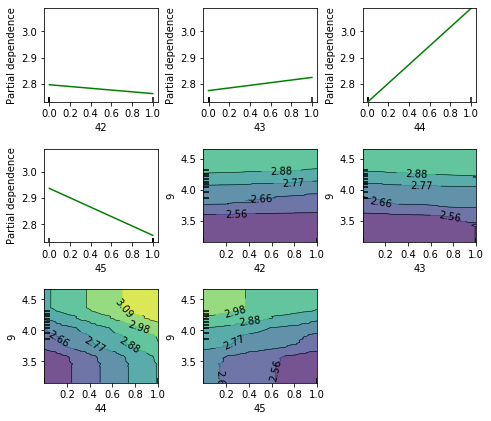

In [23]:
target_features = [42,43, 44, 45, (42,9),(43,9),(44,9),(45,9)]
fig = plot_partial_dependence(model_rf, X_train, target_features,grid_resolution=300)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


Marginal effects by ethnicity...

In [24]:
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_MX'])
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_AF'])

ETH_AF,0,1
AP_Calculus_AB_0.0,,
0,5155,91
1,12208,666


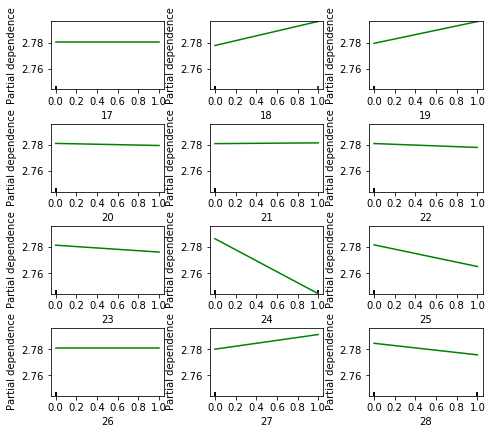

In [25]:
target_features = [*range(17,29,1)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


In [26]:
sel = SelectFromModel(perm, threshold=0.05, prefit=True)
X_trans = sel.transform(X_train)


In [27]:
# feature_idx = X_trans.get_support()
# feature_name = X_train.columns[feature_idx]

So what can I get out of the partial depence plot above? It looks like passing the AP test is worth .2 grade points on average 

**MAT 21B**

In [28]:
X_train, X_test, y_train,y_test = data_proc(df,controls,'mat21b_grade_pt')
results_mat21b = evaluate(X_train, X_test, y_train, y_test)
print(results_mat21b)
sample_leaf_options = [5,10,20,25,30,50]
                        
num_features = [10,12,14,16,18]
n_estimators = [50,100,200,400]
best_p = [0,0,0,0]
for leaf_size in sample_leaf_options:
    for nf in num_features:
        for nt in n_estimators:
            model = RandomForestRegressor(n_estimators = nt, oob_score = True, n_jobs = -1, min_samples_leaf = leaf_size,
                                       max_features=nf)
            model.fit(X_train,y_train)
            # The line below is checks the out of bag sample, which is sort of like CV.
            if model.oob_score_>best_p[3]:
                best_p = [leaf_size,nf,nt,model.oob_score_]
print(best_p)
                        
best_p = list(np.int_(best_p[0:3]))
model_rf = RandomForestRegressor(min_samples_leaf=best_p[0], n_estimators=best_p[2], max_features=best_p[1]).fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
print(model_rf.score(X_test,y_test))
                        
perm = PermutationImportance(model_rf, random_state=1).fit(X_train, y_train)
mat_21b_weights = eli5.show_weights(perm, feature_names = X_train.columns.tolist(), top=20)
mat_21b_weights.data = mat_21b_weights.data.replace('background-color:','color:black; background-color:')
mat_21b_weights

                            mae      rmse         r2
Linear Regression      0.638346  0.810875   0.247133
ElasticNet Regression  0.722847  0.907385  0.0572556
Ridge Regression       0.638195  0.810491   0.247845
Random Forest          0.642244  0.810261   0.248272
Decision Tree Reg      0.660541  0.836337    0.19911
Extra Trees            0.662896  0.852802   0.167264
SVR_rbf                0.726468  0.924701  0.0209316
Gradient Boosted       0.647896  0.821551   0.227177
Baseline               0.726932  0.950005          0
[10, 18, 400, 0.25464022529673924]
0.25086880144589907


Weight,Feature
0.0864 ± 0.0084,AP_Calculus_AB_5.0
0.0803 ± 0.0033,GPA
0.0755 ± 0.0108,SAT_TOTAL_OFFICIAL_SQ
0.0528 ± 0.0028,PEOPLE_MEAN
0.0526 ± 0.0065,AP_Calculus_BC_0.0
0.0508 ± 0.0028,AP_Calculus_BC_5.0
0.0499 ± 0.0027,APPASSED
0.0304 ± 0.0009,PLACE_MEAN
0.0303 ± 0.0026,AP_Calculus_AB_0.0
0.0260 ± 0.0018,ATOG


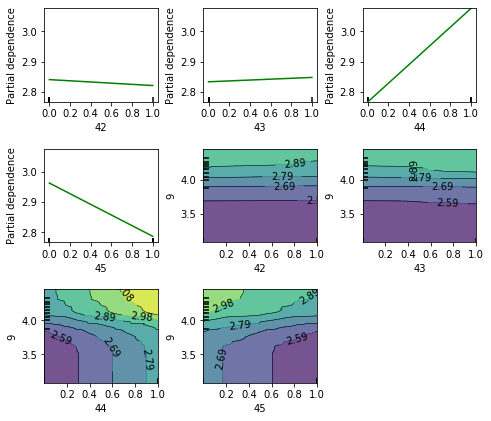

In [29]:
target_features = [42,43, 44, 45, (42,9),(43,9),(44,9),(45,9)]
fig = plot_partial_dependence(model_rf, X_train, target_features,grid_resolution=300)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


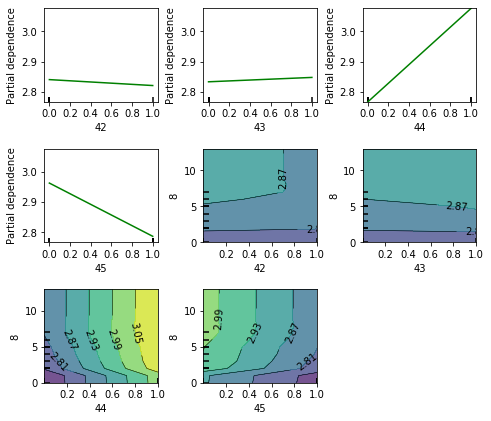

In [30]:
target_features = [42,43, 44, 45, (42,8),(43,8),(44,8),(45,8)]
fig = plot_partial_dependence(model_rf, X_train, target_features,grid_resolution=300)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


Marginal effects by ethnicity...

In [31]:
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_MX'])
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_AF'])

ETH_AF,0,1
AP_Calculus_AB_0.0,,
0,5155,91
1,12208,666


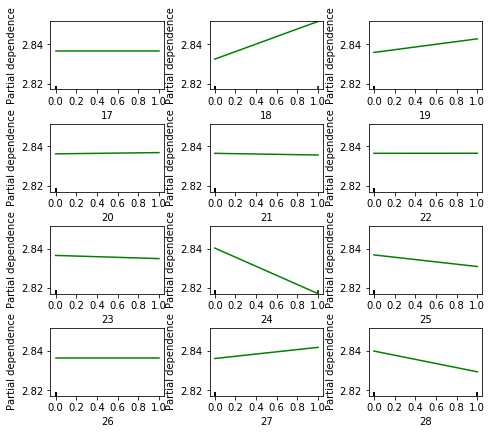

In [32]:
target_features = [*range(17,29,1)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


**MAT 16 A**

In [33]:
X_train, X_test, y_train,y_test = data_proc(df,controls,'mat16a_grade_pt')
print(X_train.shape)

results_mat16 = evaluate(X_train, X_test, y_train, y_test)
print(results_mat16)

(2018, 91)
                            mae      rmse         r2
Linear Regression      0.695555  0.898895   0.199677
ElasticNet Regression  0.780623  0.972796   0.062675
Ridge Regression       0.694874  0.898511   0.200361
Random Forest          0.696753  0.882823   0.228041
Decision Tree Reg      0.710471  0.915981   0.168965
Extra Trees            0.703624  0.905311   0.188212
SVR_rbf                0.775178  0.987374  0.0343699
Gradient Boosted       0.687491  0.882173   0.229178
Baseline               0.782333   1.04471          0


In [34]:
sample_leaf_options = [5,10,50]
num_features = [10,12,14,16,18]
n_estimators = [50,100,200]
best_p = [0,0,0,0]
for leaf_size in sample_leaf_options:
    for nf in num_features:
        for nt in n_estimators:
            model = RandomForestRegressor(n_estimators = nt, oob_score = True, n_jobs = -1, min_samples_leaf = leaf_size,
                                       max_features=nf)
            model.fit(X_train,y_train)
            # The line below is checks the out of bag sample, which is sort of like CV.
            if model.oob_score_>best_p[3]:
                best_p = [leaf_size,nf,nt,model.oob_score_]
print(best_p)

[5, 16, 200, 0.24214137353401077]


In [35]:
best_p = list(np.int_(best_p[0:3]))
model_rf = RandomForestRegressor(min_samples_leaf=best_p[0], n_estimators=best_p[2], max_features=best_p[1]).fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
print(model_rf.score(X_test,y_test))

# graph = Source(export_graphviz(model_rf.estimators_[0],
#                 feature_names=X.columns,
#                 filled=True,
#                 rounded=True))
# graph.format = 'png'
# graph.render('rf_tree',view=True)


0.23161979951660017


In [36]:
perm = PermutationImportance(model_rf, random_state=1).fit(X_train, y_train)
mat_16a_weights = eli5.show_weights(perm, feature_names = X_train.columns.tolist(), top=20)
mat_16a_weights.data = mat_16a_weights.data.replace('background-color:','color:black; background-color:')
mat_16a_weights

Weight,Feature
0.1435 ± 0.0064,GPA
0.1323 ± 0.0065,SAT_TOTAL_OFFICIAL_SQ
0.1133 ± 0.0159,AP_Calculus_AB_0.0
0.1032 ± 0.0068,APPASSED
0.0913 ± 0.0082,PEOPLE_MEAN
0.0786 ± 0.0059,PLACE_MEAN
0.0452 ± 0.0024,ATOG
0.0393 ± 0.0031,ATOGC
0.0346 ± 0.0028,ATOGG
0.0274 ± 0.0010,ATOGE


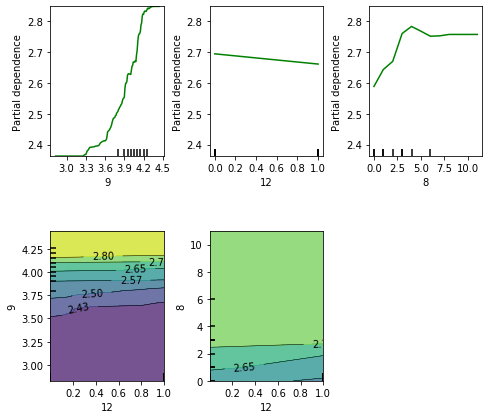

In [37]:
target_features = [9,12, 8,(12,9),(12,8)]
fig = plot_partial_dependence(model_rf, X_train, target_features,grid_resolution=300)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


Marginal effects by ethnicity...

In [38]:
pd.crosstab(index=df['mat21a_grade_pt'],columns=df['ETH_MX'])
#pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_AF'])

ETH_MX,0,1
mat21a_grade_pt,,
0.0,79,50
0.7,10,6
1.0,59,29
1.3,22,7
1.7,112,56
2.0,383,165
2.3,232,68
2.7,238,72
3.0,523,153


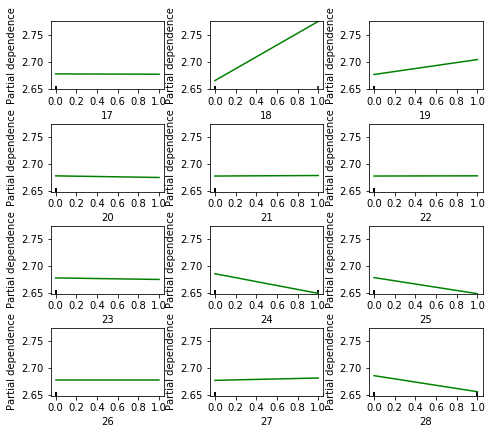

In [39]:
target_features = [*range(17,29,1)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


**BIS 2A**

In [40]:
X_train, X_test, y_train,y_test = data_proc(df,controls,'bis2a_grade_pt')
print(X_train.shape)
results_bis2a = evaluate(X_train, X_test, y_train, y_test)
print(results_bis2a)

(4646, 91)
                            mae      rmse        r2
Linear Regression      0.592416  0.772536  0.336695
ElasticNet Regression  0.683222  0.862317  0.173563
Ridge Regression       0.591822  0.771873  0.337832
Random Forest          0.592211  0.763878  0.351479
Decision Tree Reg      0.613257  0.798027  0.292199
Extra Trees            0.607155  0.786851  0.311885
SVR_rbf                0.674755  0.870027  0.158718
Gradient Boosted       0.588539  0.762464  0.353878
Baseline               0.738203  0.952815         0


In [41]:
sample_leaf_options = [5,10,50]
num_features = [10,12,14,16,18]
n_estimators = [50,100,200]
best_p = [0,0,0,0]
for leaf_size in sample_leaf_options:
    for nf in num_features:
        for nt in n_estimators:
            model = RandomForestRegressor(n_estimators = nt, oob_score = True, n_jobs = -1, min_samples_leaf = leaf_size,
                                       max_features=nf)
            model.fit(X_train,y_train)
            # The line below is checks the out of bag sample, which is sort of like CV.
            if model.oob_score_>best_p[3]:
                best_p = [leaf_size,nf,nt,model.oob_score_]
print(best_p)

[5, 12, 200, 0.3111221807373806]


In [42]:
best_p = list(np.int_(best_p[0:3]))
model_rf = RandomForestRegressor(min_samples_leaf=best_p[0], n_estimators=best_p[2], max_features=best_p[1]).fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
print(model_rf.score(X_test,y_test))

# graph = Source(export_graphviz(model_rf.estimators_[0],
#                 feature_names=X.columns,
#                 filled=True,
#                 rounded=True))
# graph.format = 'png'
# graph.render('rf_tree',view=True)


0.354125965723636


In [43]:
perm = PermutationImportance(model_rf, random_state=1).fit(X_train, y_train)
bis_2a_weights = eli5.show_weights(perm, feature_names = X_train.columns.tolist(), top=20)
bis_2a_weights.data = bis_2a_weights.data.replace('background-color:','color:black; background-color:')
bis_2a_weights

Weight,Feature
0.1279 ± 0.0065,GPA
0.0984 ± 0.0037,APPASSED
0.0914 ± 0.0029,PEOPLE_MEAN
0.0877 ± 0.0096,AP_Bio_0.0
0.0824 ± 0.0045,SAT_TOTAL_OFFICIAL_SQ
0.0502 ± 0.0010,PLACE_MEAN
0.0403 ± 0.0058,AP_Calculus_AB_0.0
0.0325 ± 0.0021,TRIPLE
0.0319 ± 0.0012,FIRST_GENERATION
0.0312 ± 0.0006,ATOG


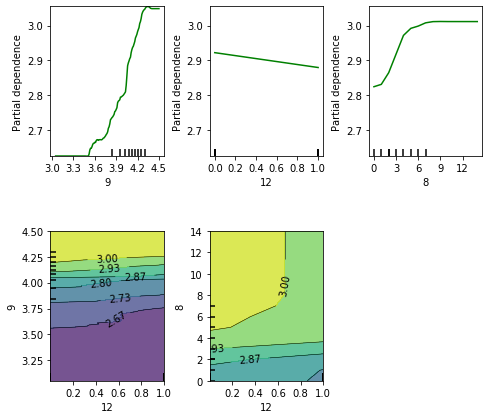

In [44]:
target_features = [9,12,8, (12,9),(12,8)]
fig = plot_partial_dependence(model_rf, X_train, target_features,grid_resolution=300)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


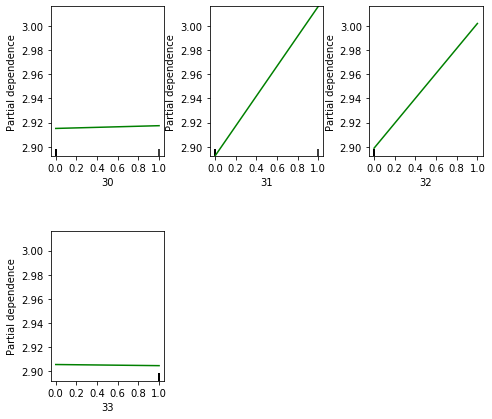

In [45]:
target_features = [30,31,32,33]
fig = plot_partial_dependence(model_rf, X_train, target_features,grid_resolution=300)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


Marginal effects by ethnicity...

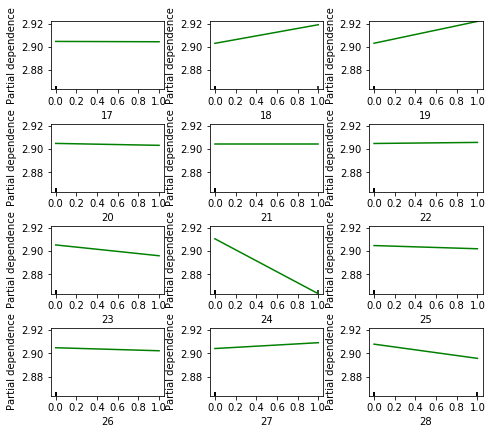

In [46]:
target_features = [*range(17,29,1)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


**BIS 2B**

In [47]:
X_train, X_test, y_train,y_test = data_proc(df,controls,'bis2b_grade_pt')
results_bis2b = evaluate(X_train, X_test, y_train, y_test)
print(X_train.shape)

sample_leaf_options = [5,10,20,25,30,50]
                        
num_features = [10,12,14,16,18]
n_estimators = [50,100,200,400]
best_p = [0,0,0,0]
for leaf_size in sample_leaf_options:
    for nf in num_features:
        for nt in n_estimators:
            model = RandomForestRegressor(n_estimators = nt, oob_score = True, n_jobs = -1, min_samples_leaf = leaf_size,
                                       max_features=nf)
            model.fit(X_train,y_train)
            # The line below is checks the out of bag sample, which is sort of like CV.
            if model.oob_score_>best_p[3]:
                best_p = [leaf_size,nf,nt,model.oob_score_]
print(best_p)
                        
best_p = list(np.int_(best_p[0:3]))
model_rf = RandomForestRegressor(min_samples_leaf=best_p[0], n_estimators=best_p[2], max_features=best_p[1]).fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
print(model_rf.score(X_test,y_test))
                        
perm = PermutationImportance(model_rf, random_state=1).fit(X_train, y_train)
bis_2b_weights = eli5.show_weights(perm, feature_names = X_train.columns.tolist(), top=20)
bis_2b_weights.data = bis_2b_weights.data.replace('background-color:','color:black; background-color:')
bis_2b_weights



(4655, 91)
[5, 16, 400, 0.38204043920781827]
0.3829121232183219


Weight,Feature
0.1813 ± 0.0128,SAT_TOTAL_OFFICIAL_SQ
0.1459 ± 0.0035,APPASSED
0.1309 ± 0.0046,GPA
0.1121 ± 0.0075,PEOPLE_MEAN
0.0552 ± 0.0052,AP_Bio_0.0
0.0476 ± 0.0017,PLACE_MEAN
0.0427 ± 0.0030,AP_Calculus_AB_0.0
0.0335 ± 0.0014,FIRST_GENERATION
0.0306 ± 0.0011,ATOG
0.0218 ± 0.0012,ATOGG


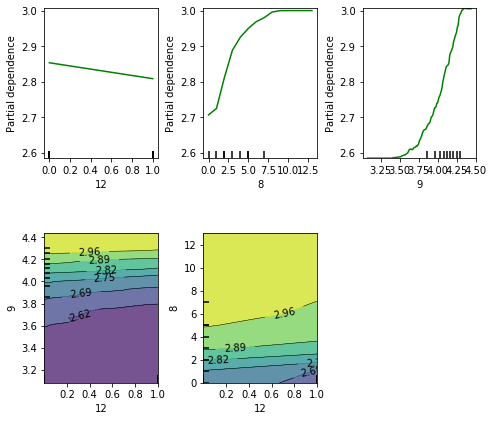

In [48]:
target_features = [12,8,9, (12,9),(12,8)]
fig = plot_partial_dependence(model_rf, X_train, target_features,grid_resolution=300)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


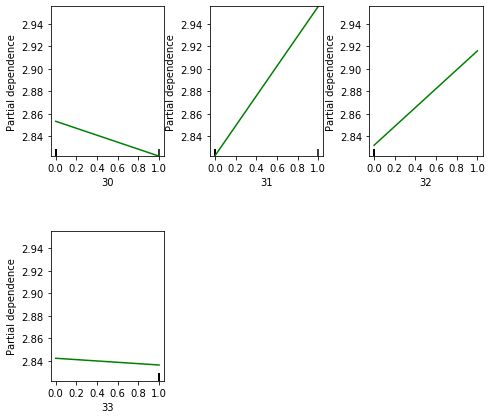

In [49]:
target_features = [30,31,32,33]
fig = plot_partial_dependence(model_rf, X_train, target_features,grid_resolution=300)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


Marginal effects by ethnicity...

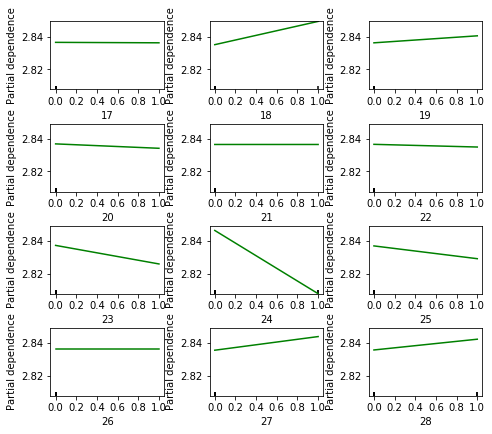

In [50]:
target_features = [*range(17,29,1)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


**CHEM 2A**

In [51]:
X_train, X_test, y_train,y_test = data_proc(df,controls,'chem2a_grade_pt')
results_chem2a = evaluate(X_train, X_test, y_train, y_test)
print(results_chem2a)

                            mae      rmse        r2
Linear Regression      0.544474  0.706786  0.374829
ElasticNet Regression  0.641968  0.807883  0.183191
Ridge Regression       0.544403  0.706692  0.374995
Random Forest          0.536017   0.69499  0.395522
Decision Tree Reg      0.557097  0.728047  0.336651
Extra Trees            0.557681  0.727184  0.338222
SVR_rbf                 0.61683  0.795636  0.207769
Gradient Boosted       0.536254   0.69626  0.393311
Baseline               0.739589  0.948502         0


In [52]:
X_train.shape

(7036, 91)

In [53]:
sample_leaf_options = [5,10,15,20,30,50]
num_features = [10,12,14,16,18]
n_estimators = [50,100,200]
best_p = [0,0,0,0]
for leaf_size in sample_leaf_options:
    for nf in num_features:
        for nt in n_estimators:
            model = RandomForestRegressor(n_estimators = nt, oob_score = True, n_jobs = -1, min_samples_leaf = leaf_size,
                                       max_features=nf)
            model.fit(X_train,y_train)
            # The line below is checks the out of bag sample, which is sort of like CV for free.
            if model.oob_score_>best_p[3]:
                best_p = [leaf_size,nf,nt,model.oob_score_]
print(best_p)

[5, 18, 200, 0.42093350486116554]


In [54]:
best_p = list(np.int_(best_p[0:3]))
model_rf = RandomForestRegressor(min_samples_leaf=best_p[0], n_estimators=best_p[2], max_features=best_p[1]).fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
print(model_rf.score(X_test,y_test))

# graph = Source(export_graphviz(model_rf.estimators_[0],
#                 feature_names=X.columns,
#                 filled=True,
#                 rounded=True))
# graph.format = 'png'
# graph.render('rf_tree',view=True)


0.3956102564968915


In [55]:
perm = PermutationImportance(model_rf, random_state=1).fit(X_train, y_train)
chem_2a_weights = eli5.show_weights(perm, feature_names = X_train.columns.tolist(), top=20)
chem_2a_weights.data = chem_2a_weights.data.replace('background-color:','color:black; background-color:')
chem_2a_weights

Weight,Feature
0.1347 ± 0.0048,GPA
0.1176 ± 0.0031,SAT_TOTAL_OFFICIAL_SQ
0.1146 ± 0.0110,AP_Chemistry_0.0
0.0959 ± 0.0031,PEOPLE_MEAN
0.0955 ± 0.0083,AP_Calculus_AB_0.0
0.0874 ± 0.0023,APPASSED
0.0456 ± 0.0039,AP_Calculus_AB_5.0
0.0448 ± 0.0007,PLACE_MEAN
0.0323 ± 0.0024,AP_Calculus_BC_0.0
0.0321 ± 0.0009,ATOG


In [56]:
alphas = 10**np.linspace(10,-2,100)*0.5
RidgeCV(alphas=alphas).fit(X_train, y_train).alpha_
#model_ridge.alpha_

16.372745814388658

In [57]:
ridge_model = Ridge(alpha=3.0679536367065814).fit(X_train,y_train)
#Ridge score
ridge_model.score(X_test,y_test)

0.375274279960758

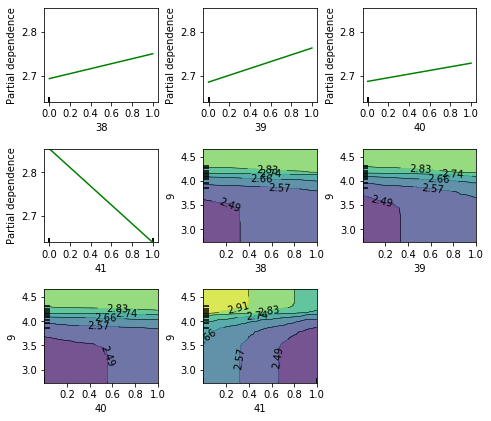

In [58]:
target_features = [38,39,40,41, (38,9),(39,9),(40,9),(41,9)]
fig = plot_partial_dependence(model_rf, X_train, target_features,grid_resolution=300)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


Marginal effects by ethnicity...

In [59]:
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_MX'])
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_AF'])

ETH_AF,0,1
AP_Calculus_AB_0.0,,
0,5155,91
1,12208,666


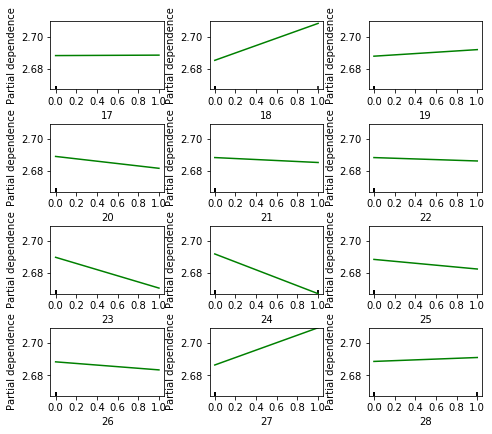

In [60]:
target_features = [*range(17,29,1)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


**CHEM 2B**

In [61]:
X_train, X_test, y_train,y_test = data_proc(df,controls,'chem2b_grade_pt')
results_ans1 = evaluate(X_train, X_test, y_train, y_test)
print(X_train.shape)

sample_leaf_options = [5,10,20,25,30,50]             
num_features = [10,12,14,16,18]
n_estimators = [50,100,200,400]
best_p = [0,0,0,0]
for leaf_size in sample_leaf_options:
    for nf in num_features:
        for nt in n_estimators:
            model = RandomForestRegressor(n_estimators = nt, oob_score = True, n_jobs = -1, min_samples_leaf = leaf_size,
                                       max_features=nf)
            model.fit(X_train,y_train)
            # The line below is checks the out of bag sample, which is sort of like CV.
            if model.oob_score_>best_p[3]:
                best_p = [leaf_size,nf,nt,model.oob_score_]
print(best_p)
                        
best_p = list(np.int_(best_p[0:3]))
model_rf = RandomForestRegressor(min_samples_leaf=best_p[0], n_estimators=best_p[2], max_features=best_p[1]).fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
print(model_rf.score(X_test,y_test))
                        
perm = PermutationImportance(model_rf, random_state=1).fit(X_train, y_train)
chem_2b_weights = eli5.show_weights(perm, feature_names = X_train.columns.tolist(), top=20)
chem_2b_weights.data = chem_2b_weights.data.replace('background-color:','color:black; background-color:')
chem_2b_weights

(5369, 91)
[5, 18, 400, 0.3742455327962241]
0.40659680221022065


Weight,Feature
0.1516 ± 0.0076,GPA
0.1345 ± 0.0117,AP_Chemistry_0.0
0.1225 ± 0.0130,SAT_TOTAL_OFFICIAL_SQ
0.0993 ± 0.0037,APPASSED
0.0932 ± 0.0025,PEOPLE_MEAN
0.0647 ± 0.0036,AP_Calculus_AB_0.0
0.0488 ± 0.0029,AP_Calculus_AB_5.0
0.0469 ± 0.0018,PLACE_MEAN
0.0342 ± 0.0003,ATOG
0.0322 ± 0.0035,AP_Calculus_BC_5.0


Q: What is feature importance, and how is it calculated? 
From the SCI-KIT Learn Documentation:

**"In scikit-learn, we implement the importance as described in [1] (often cited, but unfortunately rarely read...). It is sometimes called "gini importance" or "mean decrease impurity" and is defined as the total decrease in node impurity (weighted by the probability of reaching that node (which is approximated by the proportion of samples reaching that node)) averaged over all trees of the ensemble."**
where [1] is referring to https://rafalab.github.io/pages/649/section-11.pdf

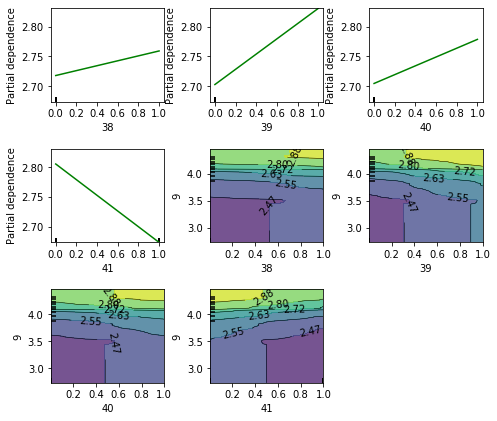

In [62]:
target_features = [38,39,40,41, (38,9),(39,9),(40,9),(41,9)]
fig = plot_partial_dependence(model_rf, X_train, target_features,grid_resolution=300)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


Marginal effects by ethnicity...

In [63]:
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_MX'])
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_AF'])

ETH_AF,0,1
AP_Calculus_AB_0.0,,
0,5155,91
1,12208,666


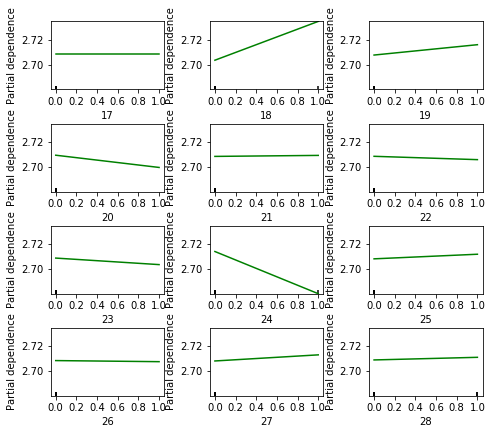

In [64]:
target_features = [*range(17,29,1)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


**ANS1**

In [65]:
# 'ans1_grade_pt',
#  'ant2_grade_pt',
#  'bis2a_grade_pt',
#  'bis2b_grade_pt',
#  'chem2a_grade_pt',
#  'chem2b_grade_pt',
#  'enl3_grade_pt',
#  'his17_grade_pt',
#  'mat16a_grade_pt',
#  'mat21a_grade_pt',
#  'mat21b_grade_pt',
#  'phy7a_grade_pt',
#  'psc1_grade_pt',
#  'sta13_grade_pt',
#  'sta100_grade_pt',
X_train, X_test, y_train,y_test = data_proc(df,controls,'ans1_grade_pt')
results_ans1 = evaluate(X_train, X_test, y_train, y_test)
print(X_train.shape)

#CV to determine optimal hyperparameters
sample_leaf_options = [5,10,20,25,30,50]                 
num_features = [10,12,14,16,18]
n_estimators = [50,100,200,400]
best_p = [0,0,0,0]
for leaf_size in sample_leaf_options:
    for nf in num_features:
        for nt in n_estimators:
            model = RandomForestRegressor(n_estimators = nt, oob_score = True, n_jobs = -1, min_samples_leaf = leaf_size,
                                       max_features=nf)
            model.fit(X_train,y_train)
            # The line below is checks the out of bag sample, which is sort of like CV.
            if model.oob_score_>best_p[3]:
                best_p = [leaf_size,nf,nt,model.oob_score_]
print(best_p)
                        
best_p = list(np.int_(best_p[0:3]))
model_rf = RandomForestRegressor(min_samples_leaf=best_p[0], n_estimators=best_p[2], max_features=best_p[1]).fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
print(model_rf.score(X_test,y_test))
                        
perm = PermutationImportance(model_rf, random_state=1).fit(X_train, y_train)
ans_1_weights = eli5.show_weights(perm, feature_names = X_train.columns.tolist(), top=20)
ans_1_weights.data = ans_1_weights.data.replace('background-color:','color:black; background-color:')
ans_1_weights


(791, 91)
[5, 18, 400, 0.42943690667565193]
0.36697679726105126


Weight,Feature
0.1259 ± 0.0120,GPA
0.1070 ± 0.0132,APPASSED
0.1048 ± 0.0099,PEOPLE_MEAN
0.0572 ± 0.0037,SAT_TOTAL_OFFICIAL_SQ
0.0460 ± 0.0063,TRIPLE
0.0396 ± 0.0110,LOW_INCOME
0.0340 ± 0.0053,FIRST_GENERATION
0.0333 ± 0.0025,PLACE_MEAN
0.0299 ± 0.0049,ETH_WH
0.0285 ± 0.0030,ETH_MX


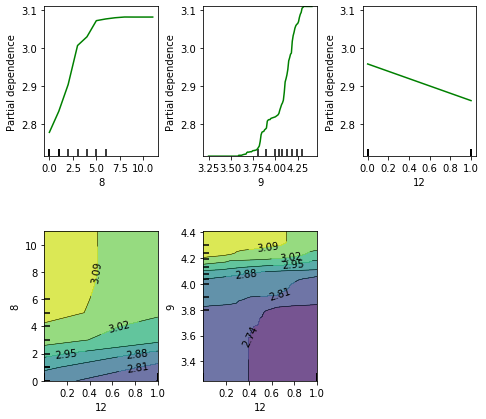

In [66]:
target_features = [8,9,12, (12,8),(12,9)]
fig = plot_partial_dependence(model_rf, X_train, target_features,grid_resolution=300)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


Marginal effects by ethnicity...

In [67]:
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_MX'])
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_AF'])

ETH_AF,0,1
AP_Calculus_AB_0.0,,
0,5155,91
1,12208,666


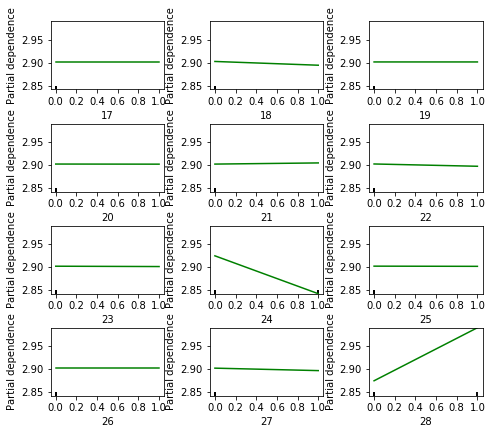

In [68]:
target_features = [*range(17,29,1)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


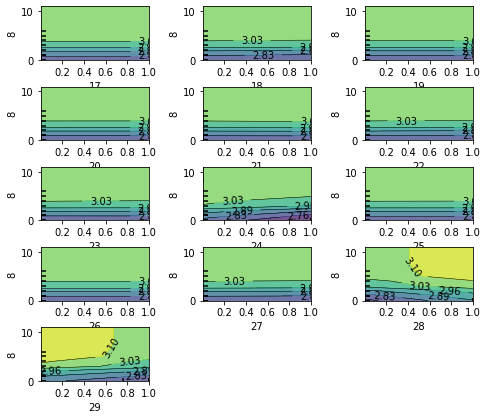

In [69]:
target_features = [(17,8),(18,8),(19,8),(20,8),(21,8),(22,8),(23,8),(24,8),(25,8),(26,8),(27,8),(28,8),(29,8)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


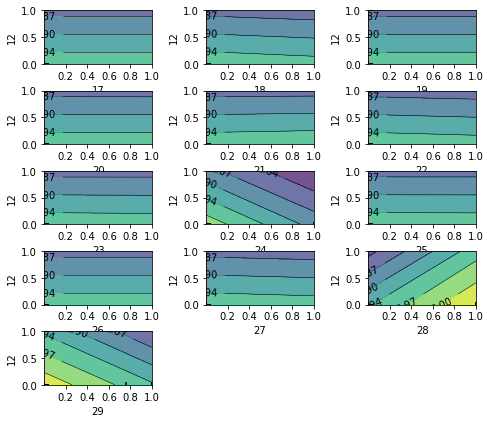

In [70]:
target_features = [(17,12),(18,12),(19,12),(20,12),(21,12),(22,12),(23,12),(24,12),(25,12),(26,12),(27,12),(28,12),(29,12)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


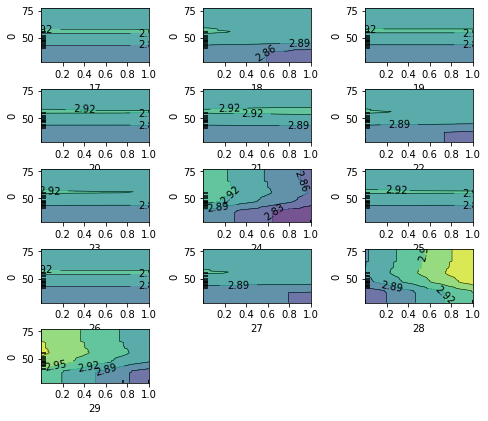

In [71]:
target_features = [(17,0),(18,0),(19,0),(20,0),(21,0),(22,0),(23,0),(24,0),(25,0),(26,0),(27,0),(28,0),(29,0)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


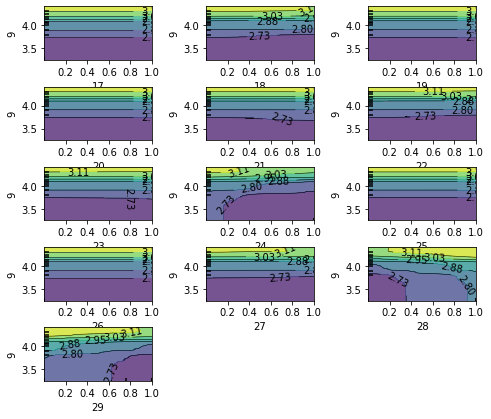

In [72]:
target_features = [(17,9),(18,9),(19,9),(20,9),(21,9),(22,9),(23,9),(24,9),(25,9),(26,9),(27,9),(28,9),(29,9)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


**ANT 2** 

In [73]:
X_train, X_test, y_train,y_test = data_proc(df,controls,'ant2_grade_pt')
results_ant2 = evaluate(X_train, X_test, y_train, y_test)
print(X_train.shape)

sample_leaf_options = [5,10,20,25,30,50]
num_features = [10,12,14,16,18]
n_estimators = [50,100,200,400]
best_p = [0,0,0,0]
for leaf_size in sample_leaf_options:
    for nf in num_features:
        for nt in n_estimators:
            model = RandomForestRegressor(n_estimators = nt, oob_score = True, n_jobs = -1, min_samples_leaf = leaf_size,
                                       max_features=nf)
            model.fit(X_train,y_train)
            # The line below is checks the out of bag sample, which is sort of like CV.
            if model.oob_score_>best_p[3]:
                best_p = [leaf_size,nf,nt,model.oob_score_]
print(best_p)
                        
best_p = list(np.int_(best_p[0:3]))
model_rf = RandomForestRegressor(min_samples_leaf=best_p[0], n_estimators=best_p[2], max_features=best_p[1]).fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
print(model_rf.score(X_test,y_test))
                        
perm = PermutationImportance(model_rf, random_state=1).fit(X_train, y_train)
ant_2_weights = eli5.show_weights(perm, feature_names = X_train.columns.tolist(), top=20)
ant_2_weights.data = ant_2_weights.data.replace('background-color:','color:black; background-color:')
ant_2_weights

(2499, 91)
[10, 16, 400, 0.12445805485485906]
0.11359477934045369


Weight,Feature
0.1071 ± 0.0063,GPA
0.0874 ± 0.0052,APPASSED
0.0708 ± 0.0031,PEOPLE_MEAN
0.0552 ± 0.0111,SAT_TOTAL_OFFICIAL_SQ
0.0436 ± 0.0041,PLACE_MEAN
0.0280 ± 0.0031,ATOG
0.0216 ± 0.0017,FIRST_GENERATION
0.0189 ± 0.0019,ATOGE
0.0183 ± 0.0016,ATOGG
0.0172 ± 0.0028,ATOGD


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.300e+01, 1.000e+00, 8.000e+00, 4.000e+00, 1.400e+01, 6.600e+01,
        1.020e+02, 3.000e+02, 4.580e+02, 2.605e+03]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

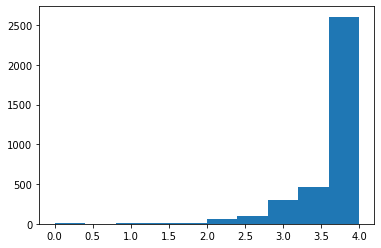

In [74]:
plt.hist(df['ant2_grade_pt'])

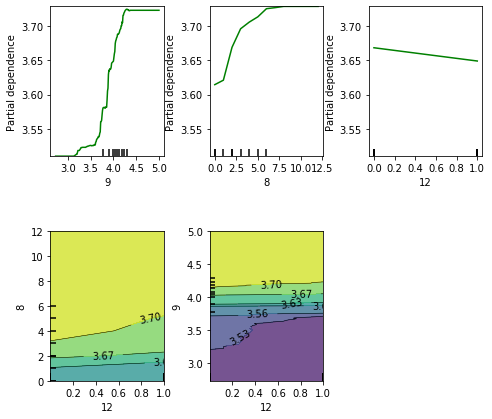

In [75]:
target_features = [9,8, 12, (12,8),(12,9)]
fig = plot_partial_dependence(model_rf, X_train, target_features,grid_resolution=300)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


Marginal effects by ethnicity...

In [76]:
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_MX'])
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_AF'])

ETH_AF,0,1
AP_Calculus_AB_0.0,,
0,5155,91
1,12208,666


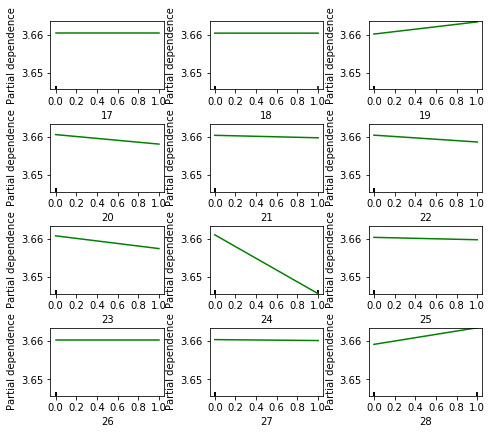

In [77]:
target_features = [*range(17,29,1)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


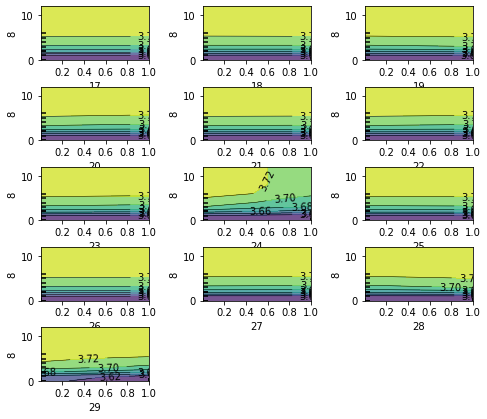

In [78]:
target_features = [(17,8),(18,8),(19,8),(20,8),(21,8),(22,8),(23,8),(24,8),(25,8),(26,8),(27,8),(28,8),(29,8)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


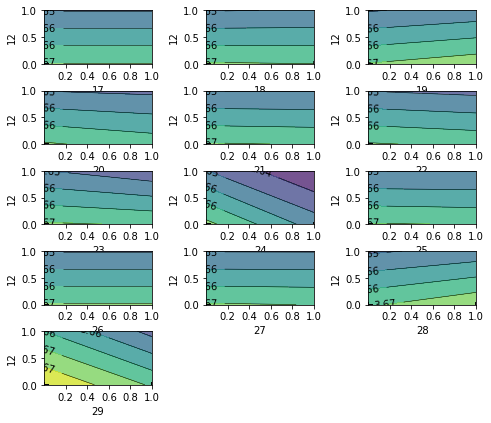

In [79]:
target_features = [(17,12),(18,12),(19,12),(20,12),(21,12),(22,12),(23,12),(24,12),(25,12),(26,12),(27,12),(28,12),(29,12)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


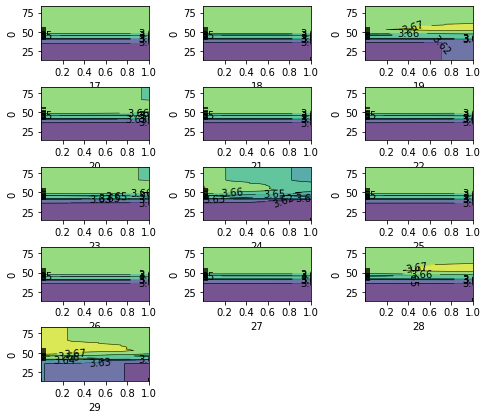

In [80]:
target_features = [(17,0),(18,0),(19,0),(20,0),(21,0),(22,0),(23,0),(24,0),(25,0),(26,0),(27,0),(28,0),(29,0)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


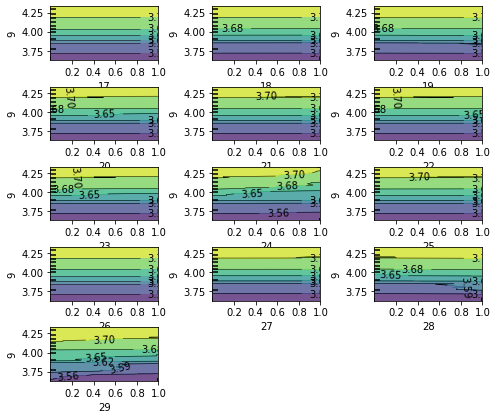

In [81]:
target_features = [(17,9),(18,9),(19,9),(20,9),(21,9),(22,9),(23,9),(24,9),(25,9),(26,9),(27,9),(28,9),(29,9)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


**BIS 2B**

In [82]:
X_train, X_test, y_train,y_test = data_proc(df,controls,'bis2b_grade_pt')
results_bis2b = evaluate(X_train, X_test, y_train, y_test)
print(X_train.shape)

sample_leaf_options = [5,10,20,25,30,50]
num_features = [10,12,14,16,18]
n_estimators = [50,100,200,400]
best_p = [0,0,0,0]
for leaf_size in sample_leaf_options:
    for nf in num_features:
        for nt in n_estimators:
            model = RandomForestRegressor(n_estimators = nt, oob_score = True, n_jobs = -1, min_samples_leaf = leaf_size,
                                       max_features=nf)
            model.fit(X_train,y_train)
            # The line below is checks the out of bag sample, which is sort of like CV.
            if model.oob_score_>best_p[3]:
                best_p = [leaf_size,nf,nt,model.oob_score_]
print(best_p)
                        
best_p = list(np.int_(best_p[0:3]))
model_rf = RandomForestRegressor(min_samples_leaf=best_p[0], n_estimators=best_p[2], max_features=best_p[1]).fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
print(model_rf.score(X_test,y_test))
                        
perm = PermutationImportance(model_rf, random_state=1).fit(X_train, y_train)
bis_2b_weights = eli5.show_weights(perm, feature_names = X_train.columns.tolist(), top=20)
bis_2b_weights.data = bis_2b_weights.data.replace('background-color:','color:black; background-color:')
bis_2b_weights

(4655, 91)
[5, 18, 400, 0.38531624307273316]
0.3749090238897233


Weight,Feature
0.1863 ± 0.0074,SAT_TOTAL_OFFICIAL_SQ
0.1444 ± 0.0060,APPASSED
0.1440 ± 0.0048,GPA
0.1157 ± 0.0064,PEOPLE_MEAN
0.0609 ± 0.0080,AP_Bio_0.0
0.0503 ± 0.0060,AP_Calculus_AB_0.0
0.0476 ± 0.0015,PLACE_MEAN
0.0360 ± 0.0019,FIRST_GENERATION
0.0286 ± 0.0012,ATOG
0.0235 ± 0.0008,ATOGG


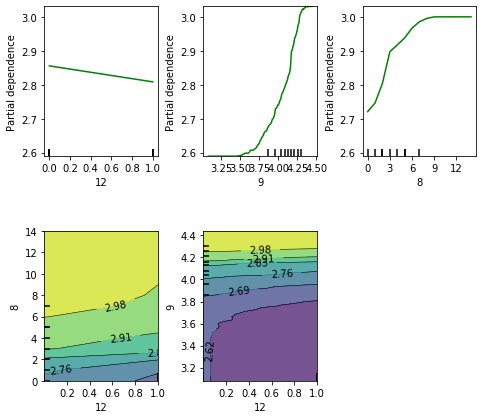

In [83]:
target_features = [12,9,8, (12,8),(12,9)]
fig = plot_partial_dependence(model_rf, X_train, target_features,grid_resolution=300)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


Marginal effects by ethnicity...

In [84]:
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_MX'])
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_AF'])

ETH_AF,0,1
AP_Calculus_AB_0.0,,
0,5155,91
1,12208,666


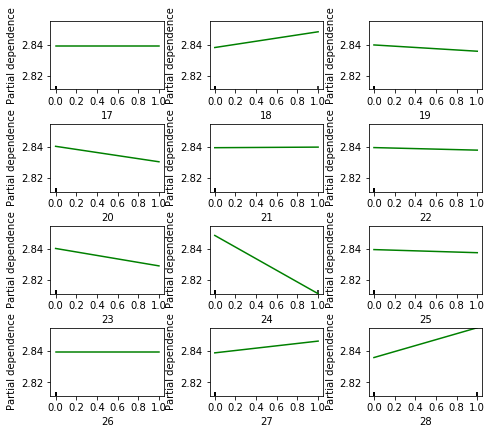

In [85]:
target_features = [*range(17,29,1)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


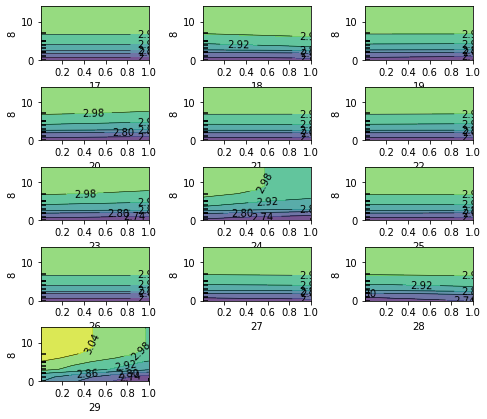

In [86]:
target_features = [(17,8),(18,8),(19,8),(20,8),(21,8),(22,8),(23,8),(24,8),(25,8),(26,8),(27,8),(28,8),(29,8)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


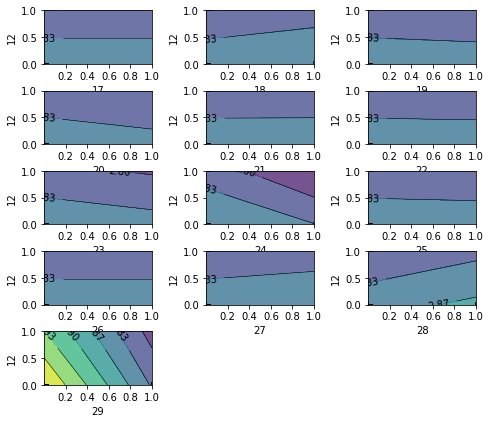

In [87]:
target_features = [(17,12),(18,12),(19,12),(20,12),(21,12),(22,12),(23,12),(24,12),(25,12),(26,12),(27,12),(28,12),(29,12)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


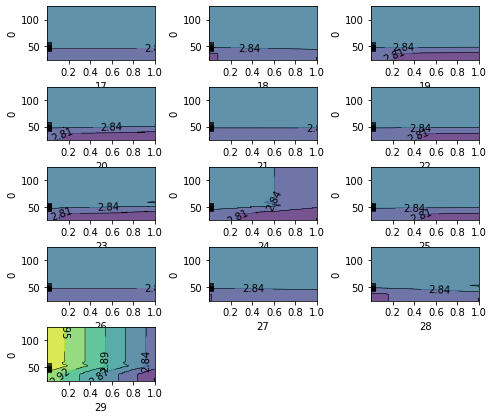

In [88]:
target_features = [(17,0),(18,0),(19,0),(20,0),(21,0),(22,0),(23,0),(24,0),(25,0),(26,0),(27,0),(28,0),(29,0)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


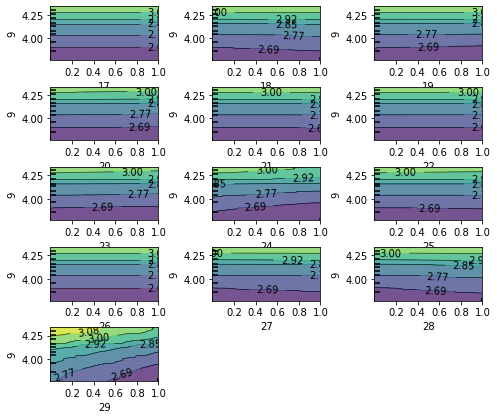

In [89]:
target_features = [(17,9),(18,9),(19,9),(20,9),(21,9),(22,9),(23,9),(24,9),(25,9),(26,9),(27,9),(28,9),(29,9)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


**ENL 3**

In [90]:

X_train, X_test, y_train,y_test = data_proc(df,controls,'enl3_grade_pt')
results_enl3 = evaluate(X_train, X_test, y_train, y_test)
print(X_train.shape)

sample_leaf_options = [5,10,20,25,30,50]
num_features = [10,12,14,16,18]
n_estimators = [50,100,200,400]
best_p = [0,0,0,0]
for leaf_size in sample_leaf_options:
    for nf in num_features:
        for nt in n_estimators:
            model = RandomForestRegressor(n_estimators = nt, oob_score = True, n_jobs = -1, min_samples_leaf = leaf_size,
                                       max_features=nf)
            model.fit(X_train,y_train)
            # The line below is checks the out of bag sample, which is sort of like CV.
            if model.oob_score_>best_p[3]:
                best_p = [leaf_size,nf,nt,model.oob_score_]
print(best_p)
                        
best_p = list(np.int_(best_p[0:3]))
model_rf = RandomForestRegressor(min_samples_leaf=best_p[0], n_estimators=best_p[2], max_features=best_p[1]).fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
print(model_rf.score(X_test,y_test))
                        
perm = PermutationImportance(model_rf, random_state=1).fit(X_train, y_train)
enl_3_weights = eli5.show_weights(perm, feature_names = X_train.columns.tolist(), top=20)
enl_3_weights.data = enl_3_weights.data.replace('background-color:','color:black; background-color:')
enl_3_weights

(3249, 91)
[10, 16, 400, 0.10478050722415055]
0.11251040019323566


Weight,Feature
0.1003 ± 0.0071,GPA
0.0788 ± 0.0073,APPASSED
0.0685 ± 0.0050,PEOPLE_MEAN
0.0446 ± 0.0015,SAT_TOTAL_OFFICIAL_SQ
0.0410 ± 0.0021,PLACE_MEAN
0.0295 ± 0.0015,ATOG
0.0286 ± 0.0044,LOW_INCOME
0.0258 ± 0.0032,FIRST_GENERATION
0.0230 ± 0.0016,TRIPLE
0.0207 ± 0.0024,SEX_F


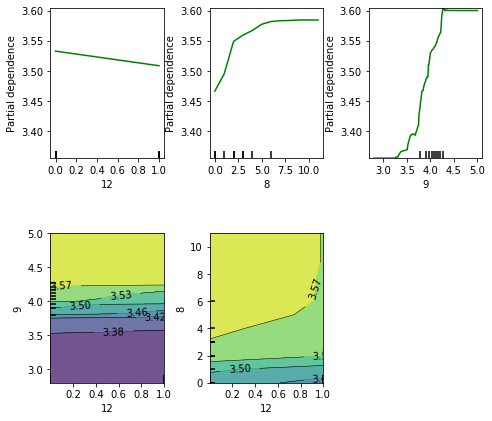

In [91]:
target_features = [12,8,9,(12,9),(12,8)]
fig = plot_partial_dependence(model_rf, X_train, target_features,grid_resolution=300)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


Marginal effects by ethnicity...

In [92]:
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_MX'])
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_AF'])

ETH_AF,0,1
AP_Calculus_AB_0.0,,
0,5155,91
1,12208,666


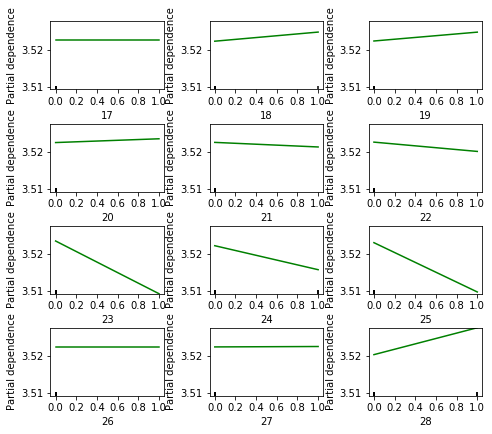

In [93]:
target_features = [*range(17,29,1)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


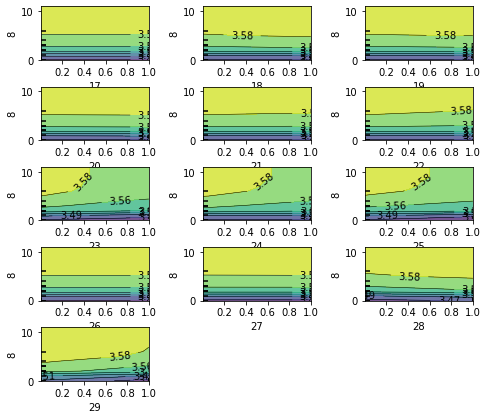

In [94]:
target_features = [(17,8),(18,8),(19,8),(20,8),(21,8),(22,8),(23,8),(24,8),(25,8),(26,8),(27,8),(28,8),(29,8)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


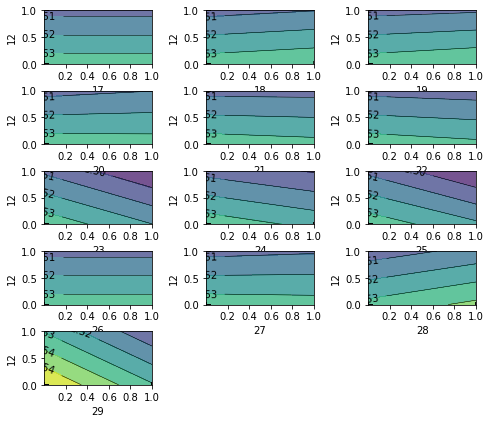

In [95]:
target_features = [(17,12),(18,12),(19,12),(20,12),(21,12),(22,12),(23,12),(24,12),(25,12),(26,12),(27,12),(28,12),(29,12)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


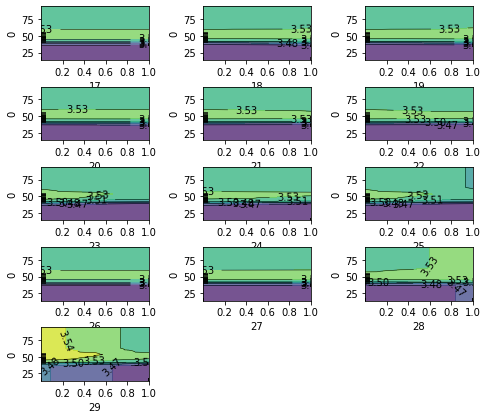

In [96]:
target_features = [(17,0),(18,0),(19,0),(20,0),(21,0),(22,0),(23,0),(24,0),(25,0),(26,0),(27,0),(28,0),(29,0)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


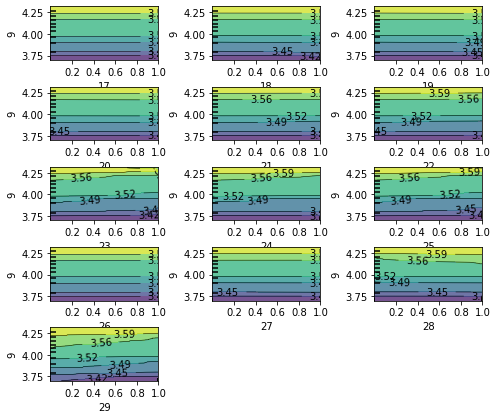

In [97]:
target_features = [(17,9),(18,9),(19,9),(20,9),(21,9),(22,9),(23,9),(24,9),(25,9),(26,9),(27,9),(28,9),(29,9)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


**HIS 17**

In [98]:

X_train, X_test, y_train,y_test = data_proc(df,controls,'his17_grade_pt')
results_his17 = evaluate(X_train, X_test, y_train, y_test)
print(X_train.shape)

sample_leaf_options = [5,10,20,25,30,50]
num_features = [10,12,14,16,18]
n_estimators = [50,100,200,400]
best_p = [0,0,0,0]
for leaf_size in sample_leaf_options:
    for nf in num_features:
        for nt in n_estimators:
            model = RandomForestRegressor(n_estimators = nt, oob_score = True, n_jobs = -1, min_samples_leaf = leaf_size,
                                       max_features=nf)
            model.fit(X_train,y_train)
            # The line below is checks the out of bag sample, which is sort of like CV.
            if model.oob_score_>best_p[3]:
                best_p = [leaf_size,nf,nt,model.oob_score_]
print(best_p)
                        
best_p = list(np.int_(best_p[0:3]))
model_rf = RandomForestRegressor(min_samples_leaf=best_p[0], n_estimators=best_p[2], max_features=best_p[1]).fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
print(model_rf.score(X_test,y_test))
                        
perm = PermutationImportance(model_rf, random_state=1).fit(X_train, y_train)
his_17_weights = eli5.show_weights(perm, feature_names = X_train.columns.tolist(), top=20)
his_17_weights.data = his_17_weights.data.replace('background-color:','color:black; background-color:')
his_17_weights

(392, 91)
[5, 12, 100, 0.1873055840006761]
0.14235654288501465


Weight,Feature
0.1062 ± 0.0114,GPA
0.0745 ± 0.0142,APPASSED
0.0527 ± 0.0051,PEOPLE_MEAN
0.0517 ± 0.0057,TRIPLE
0.0468 ± 0.0094,ATOG
0.0360 ± 0.0023,SAT_TOTAL_OFFICIAL_SQ
0.0327 ± 0.0090,FIRST_GENERATION
0.0316 ± 0.0018,PLACE_MEAN
0.0284 ± 0.0122,LOW_INCOME
0.0240 ± 0.0047,ATOGG


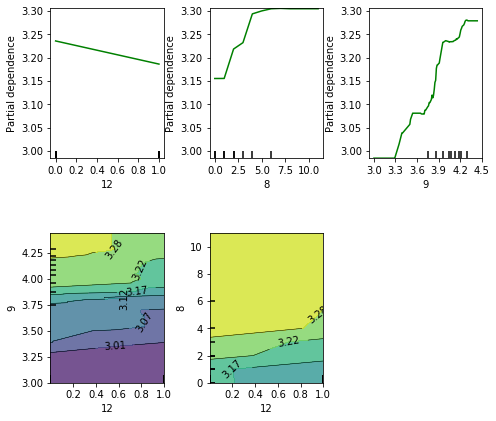

In [99]:
target_features = [12,8,9,(12,9),(12,8)]
fig = plot_partial_dependence(model_rf, X_train, target_features,grid_resolution=300)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


Marginal effects by ethnicity...

In [100]:
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_MX'])
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_AF'])

ETH_AF,0,1
AP_Calculus_AB_0.0,,
0,5155,91
1,12208,666


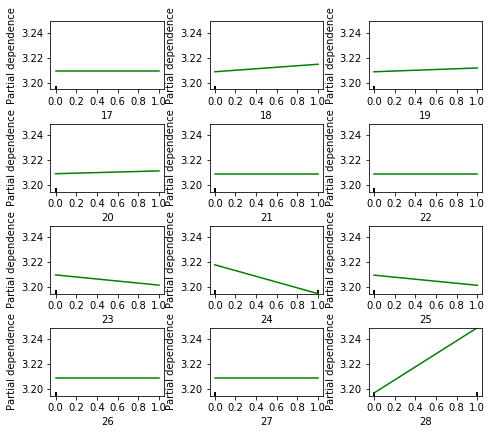

In [101]:
target_features = [*range(17,29,1)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


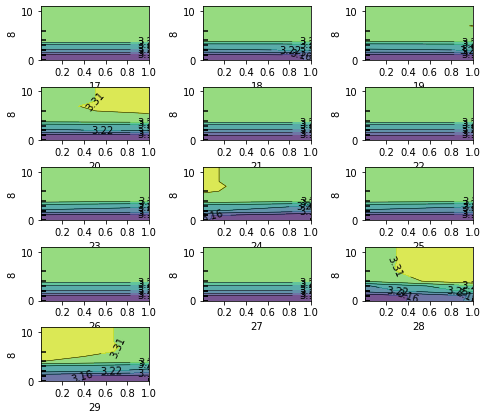

In [102]:
target_features = [(17,8),(18,8),(19,8),(20,8),(21,8),(22,8),(23,8),(24,8),(25,8),(26,8),(27,8),(28,8),(29,8)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


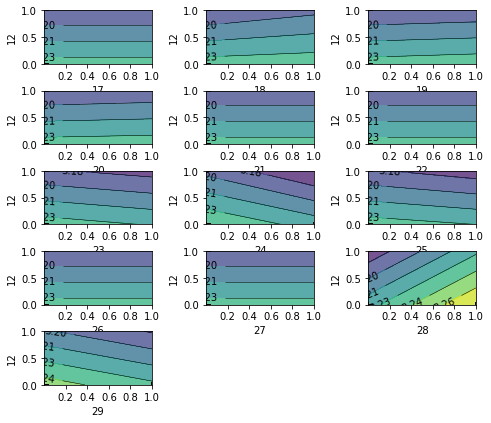

In [103]:
target_features = [(17,12),(18,12),(19,12),(20,12),(21,12),(22,12),(23,12),(24,12),(25,12),(26,12),(27,12),(28,12),(29,12)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


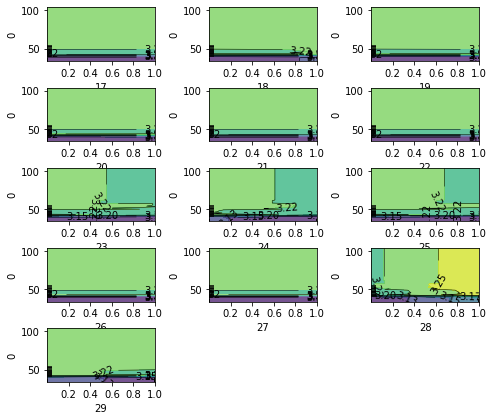

In [104]:
target_features = [(17,0),(18,0),(19,0),(20,0),(21,0),(22,0),(23,0),(24,0),(25,0),(26,0),(27,0),(28,0),(29,0)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


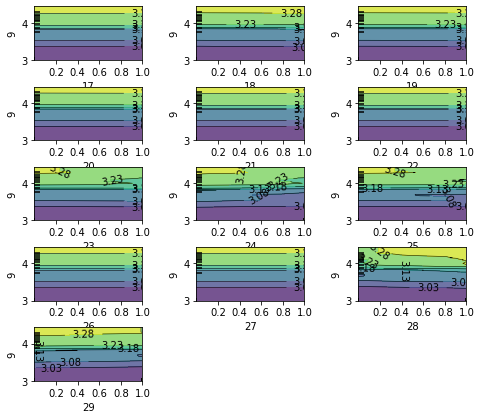

In [105]:
target_features = [(17,9),(18,9),(19,9),(20,9),(21,9),(22,9),(23,9),(24,9),(25,9),(26,9),(27,9),(28,9),(29,9)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


**PSC 01**

In [106]:
X_train, X_test, y_train,y_test = data_proc(df,controls,'psc1_grade_pt')
print(X_train.shape)

results_psc1 = evaluate(X_train, X_test, y_train, y_test)
sample_leaf_options = [5,10,20,25,30,50]
num_features = [10,12,14,16,18]
n_estimators = [50,100,200,400]
best_p = [0,0,0,0]
for leaf_size in sample_leaf_options:
    for nf in num_features:
        for nt in n_estimators:
            model = RandomForestRegressor(n_estimators = nt, oob_score = True, n_jobs = -1, min_samples_leaf = leaf_size,
                                       max_features=nf)
            model.fit(X_train,y_train)
            # The line below is checks the out of bag sample, which is sort of like CV.
            if model.oob_score_>best_p[3]:
                best_p = [leaf_size,nf,nt,model.oob_score_]
print(best_p)
                        
best_p = list(np.int_(best_p[0:3]))
model_rf = RandomForestRegressor(min_samples_leaf=best_p[0], n_estimators=best_p[2], max_features=best_p[1]).fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
print(model_rf.score(X_test,y_test))
                        
perm = PermutationImportance(model_rf, random_state=1).fit(X_train, y_train)
psc_1_weights = eli5.show_weights(perm, feature_names = X_train.columns.tolist(), top=20)
psc_1_weights.data = psc_1_weights.data.replace('background-color:','color:black; background-color:')
psc_1_weights

(3107, 91)
[5, 14, 200, 0.26615603941336285]
0.25096349841210264


Weight,Feature
0.1729 ± 0.0066,GPA
0.1255 ± 0.0079,APPASSED
0.1160 ± 0.0103,SAT_TOTAL_OFFICIAL_SQ
0.1132 ± 0.0042,PEOPLE_MEAN
0.0527 ± 0.0012,PLACE_MEAN
0.0511 ± 0.0032,ATOG
0.0395 ± 0.0046,FIRST_GENERATION
0.0259 ± 0.0012,ATOGE
0.0256 ± 0.0018,ATOGG
0.0254 ± 0.0011,ATOGC


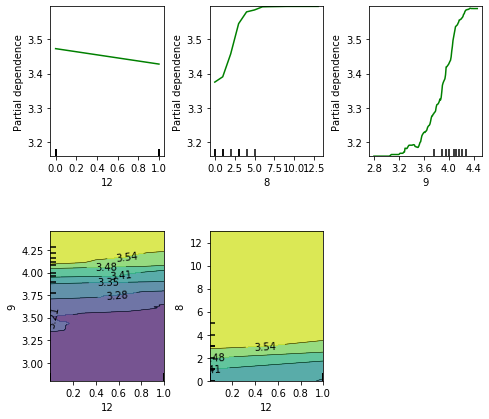

In [107]:
target_features = [12,8,9,(12,9),(12,8)]
fig = plot_partial_dependence(model_rf, X_train, target_features,grid_resolution=300)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


Marginal effects by ethnicity...

In [108]:
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_MX'])
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_AF'])

ETH_AF,0,1
AP_Calculus_AB_0.0,,
0,5155,91
1,12208,666


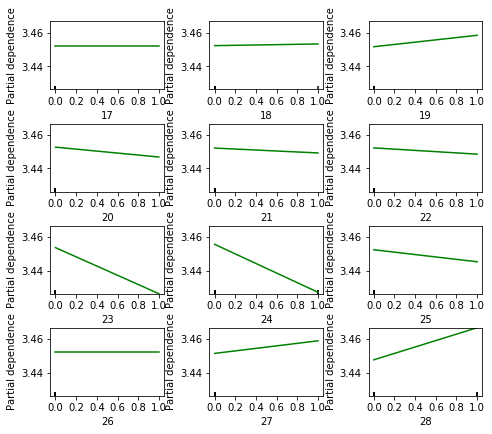

In [109]:
target_features = [*range(17,29,1)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


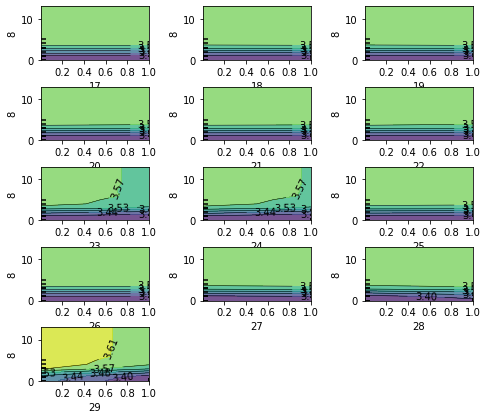

In [110]:
target_features = [(17,8),(18,8),(19,8),(20,8),(21,8),(22,8),(23,8),(24,8),(25,8),(26,8),(27,8),(28,8),(29,8)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


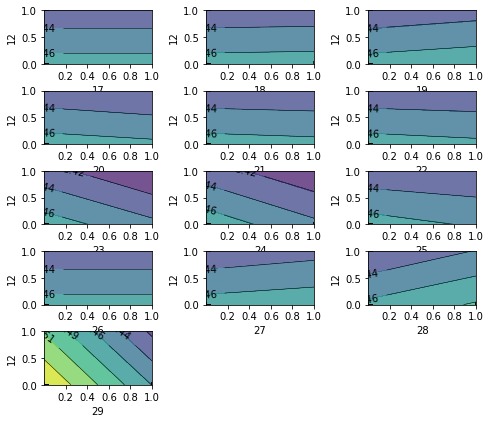

In [111]:
target_features = [(17,12),(18,12),(19,12),(20,12),(21,12),(22,12),(23,12),(24,12),(25,12),(26,12),(27,12),(28,12),(29,12)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


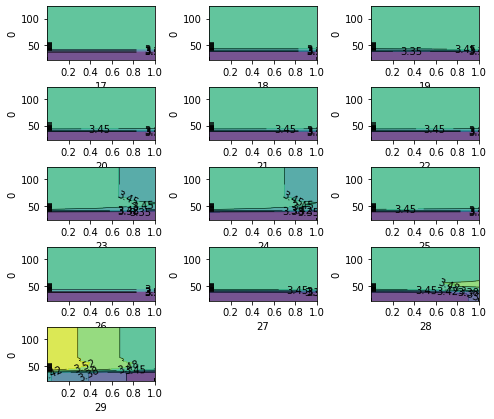

In [112]:
target_features = [(17,0),(18,0),(19,0),(20,0),(21,0),(22,0),(23,0),(24,0),(25,0),(26,0),(27,0),(28,0),(29,0)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


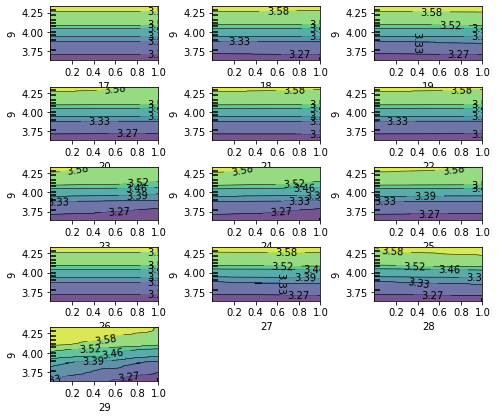

In [113]:
target_features = [(17,9),(18,9),(19,9),(20,9),(21,9),(22,9),(23,9),(24,9),(25,9),(26,9),(27,9),(28,9),(29,9)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


**STA 13**

In [114]:
X_train, X_test, y_train,y_test = data_proc(df,controls,'sta13_grade_pt')
print(X_train.shape)
results_sta13 = evaluate(X_train, X_test, y_train, y_test)
sample_leaf_options = [5,10,20,25,30,50]
num_features = [10,12,14,16,18]
n_estimators = [50,100,200,400]
best_p = [0,0,0,0]
for leaf_size in sample_leaf_options:
    for nf in num_features:
        for nt in n_estimators:
            model = RandomForestRegressor(n_estimators = nt, oob_score = True, n_jobs = -1, min_samples_leaf = leaf_size,
                                       max_features=nf)
            model.fit(X_train,y_train)
            # The line below is checks the out of bag sample, which is sort of like CV.
            if model.oob_score_>best_p[3]:
                best_p = [leaf_size,nf,nt,model.oob_score_]
print(best_p)
                        
best_p = list(np.int_(best_p[0:3]))
model_rf = RandomForestRegressor(min_samples_leaf=best_p[0], n_estimators=best_p[2], max_features=best_p[1]).fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
print(model_rf.score(X_test,y_test))
                        
perm = PermutationImportance(model_rf, random_state=1).fit(X_train, y_train)
sta_13_weights = eli5.show_weights(perm, feature_names = X_train.columns.tolist(), top=20)
sta_13_weights.data = sta_13_weights.data.replace('background-color:','color:black; background-color:')
sta_13_weights

(2901, 91)
[5, 14, 400, 0.3158785989318519]
0.3178491586977067


Weight,Feature
0.1437 ± 0.0143,GPA
0.1067 ± 0.0101,SAT_TOTAL_OFFICIAL_SQ
0.0985 ± 0.0041,APPASSED
0.0901 ± 0.0036,PEOPLE_MEAN
0.0521 ± 0.0030,PLACE_MEAN
0.0436 ± 0.0008,AP_Calculus_AB_0.0
0.0408 ± 0.0033,TRIPLE
0.0386 ± 0.0030,FIRST_GENERATION
0.0372 ± 0.0015,ATOG
0.0324 ± 0.0031,ATOGC


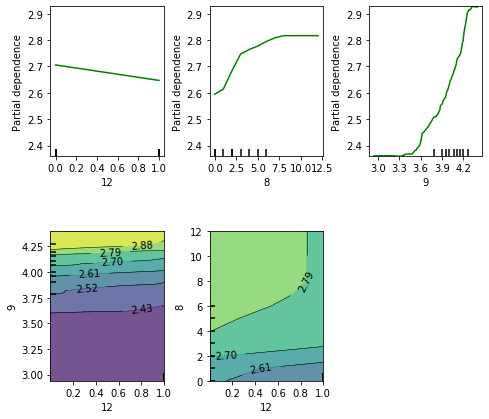

In [115]:
target_features = [12,8,9,(12,9),(12,8)]
fig = plot_partial_dependence(model_rf, X_train, target_features,grid_resolution=300)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


Marginal effects by ethnicity...

In [116]:
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_MX'])
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_AF'])

ETH_AF,0,1
AP_Calculus_AB_0.0,,
0,5155,91
1,12208,666


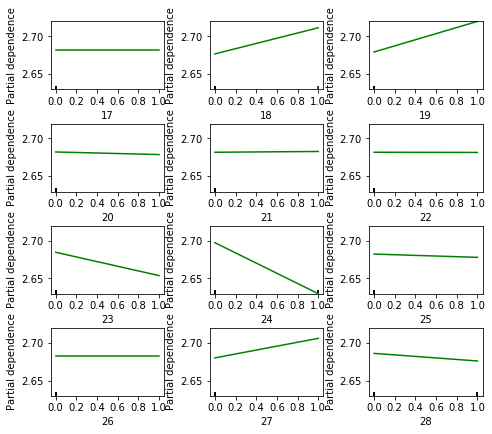

In [117]:
target_features = [*range(17,29,1)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


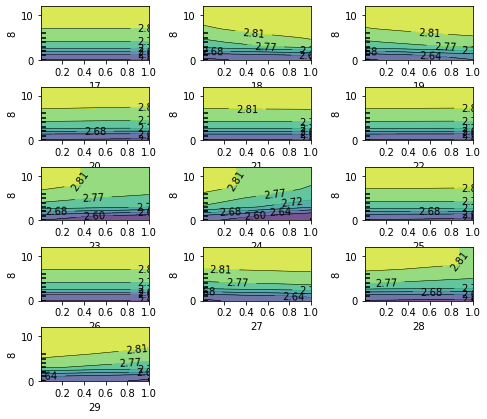

In [118]:
target_features = [(17,8),(18,8),(19,8),(20,8),(21,8),(22,8),(23,8),(24,8),(25,8),(26,8),(27,8),(28,8),(29,8)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


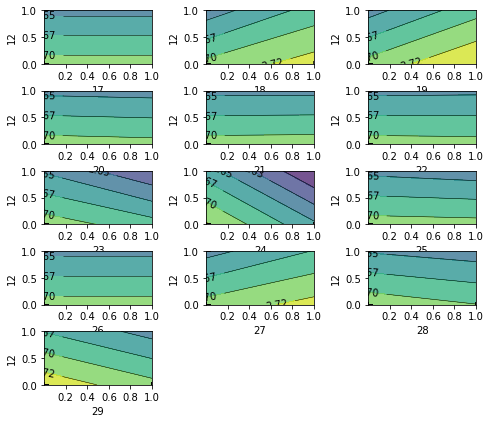

In [119]:
target_features = [(17,12),(18,12),(19,12),(20,12),(21,12),(22,12),(23,12),(24,12),(25,12),(26,12),(27,12),(28,12),(29,12)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


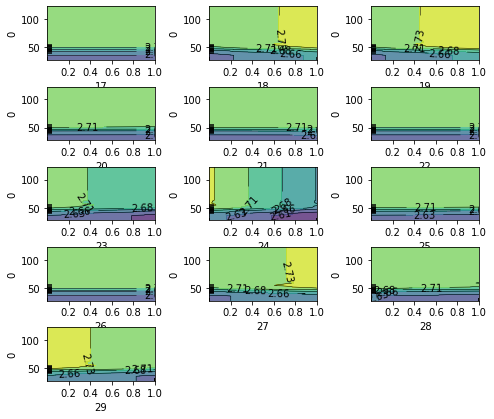

In [120]:
target_features = [(17,0),(18,0),(19,0),(20,0),(21,0),(22,0),(23,0),(24,0),(25,0),(26,0),(27,0),(28,0),(29,0)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


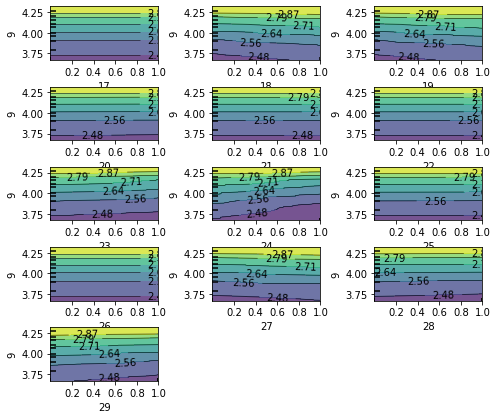

In [121]:
target_features = [(17,9),(18,9),(19,9),(20,9),(21,9),(22,9),(23,9),(24,9),(25,9),(26,9),(27,9),(28,9),(29,9)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


**STA 100**

In [122]:
X_train, X_test, y_train,y_test = data_proc(df,controls,'sta100_grade_pt')
print(X_train.shape)
results_sta100 = evaluate(X_train, X_test, y_train, y_test)
sample_leaf_options = [5,10,20,25,30,50]
num_features = [10,12,14,16,18]
n_estimators = [50,100,200,400]
best_p = [0,0,0,0]
for leaf_size in sample_leaf_options:
    for nf in num_features:
        for nt in n_estimators:
            model = RandomForestRegressor(n_estimators = nt, oob_score = True, n_jobs = -1, min_samples_leaf = leaf_size,
                                       max_features=nf)
            model.fit(X_train,y_train)
            # The line below is checks the out of bag sample, which is sort of like CV.
            if model.oob_score_>best_p[3]:
                best_p = [leaf_size,nf,nt,model.oob_score_]
print(best_p)
                        
best_p = list(np.int_(best_p[0:3]))
model_rf = RandomForestRegressor(min_samples_leaf=best_p[0], n_estimators=best_p[2], max_features=best_p[1]).fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
print(model_rf.score(X_test,y_test))
                        
perm = PermutationImportance(model_rf, random_state=1).fit(X_train, y_train)
sta_100_weights = eli5.show_weights(perm, feature_names = X_train.columns.tolist(), top=20)
sta_100_weights.data = sta_100_weights.data.replace('background-color:','color:black; background-color:')
sta_100_weights

(2184, 91)
[5, 12, 400, 0.27482929619685303]
0.28029039019526625


Weight,Feature
0.1185 ± 0.0076,GPA
0.1008 ± 0.0063,PEOPLE_MEAN
0.0900 ± 0.0039,APPASSED
0.0859 ± 0.0074,SAT_TOTAL_OFFICIAL_SQ
0.0484 ± 0.0036,PLACE_MEAN
0.0437 ± 0.0041,ATOG
0.0387 ± 0.0019,FIRST_GENERATION
0.0353 ± 0.0036,AP_Calculus_AB_0.0
0.0274 ± 0.0022,AP_Stats_0.0
0.0270 ± 0.0023,ETH_MX


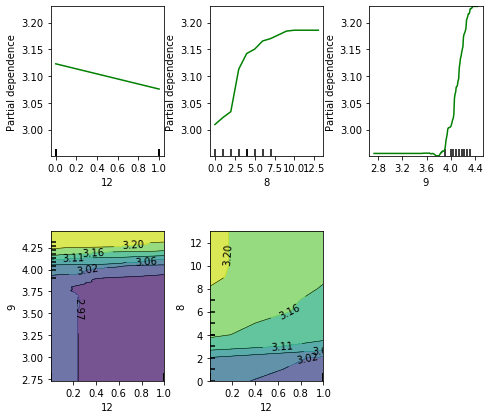

In [123]:
target_features = [12,8,9,(12,9),(12,8)]
fig = plot_partial_dependence(model_rf, X_train, target_features,grid_resolution=300)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


Marginal effects by ethnicity...

In [124]:
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_MX'])
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_AF'])

ETH_AF,0,1
AP_Calculus_AB_0.0,,
0,5155,91
1,12208,666


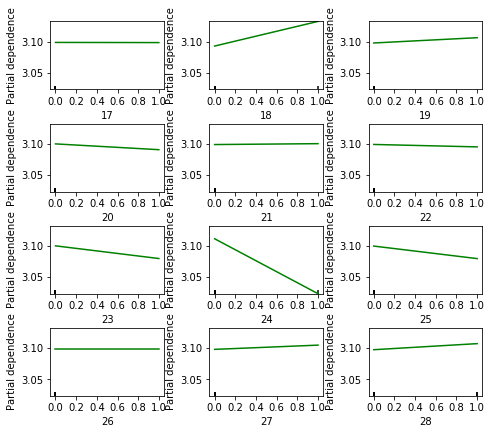

In [125]:
target_features = [*range(17,29,1)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


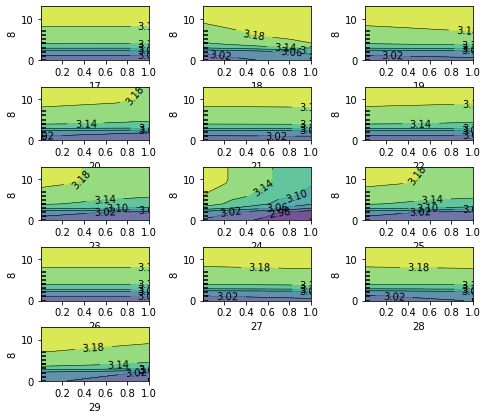

In [126]:
target_features = [(17,8),(18,8),(19,8),(20,8),(21,8),(22,8),(23,8),(24,8),(25,8),(26,8),(27,8),(28,8),(29,8)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


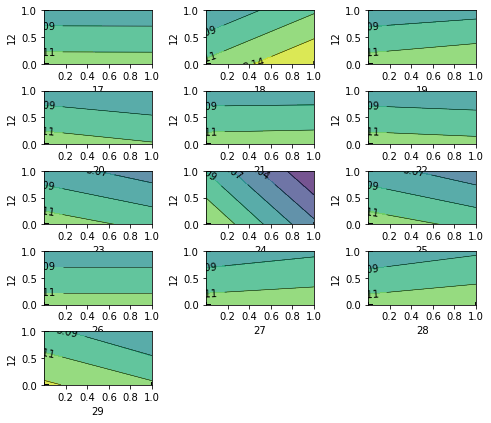

In [127]:
target_features = [(17,12),(18,12),(19,12),(20,12),(21,12),(22,12),(23,12),(24,12),(25,12),(26,12),(27,12),(28,12),(29,12)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


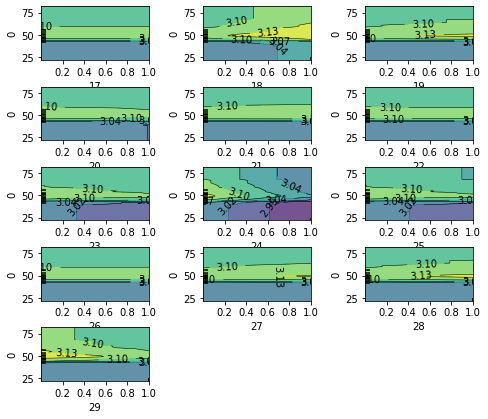

In [128]:
target_features = [(17,0),(18,0),(19,0),(20,0),(21,0),(22,0),(23,0),(24,0),(25,0),(26,0),(27,0),(28,0),(29,0)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


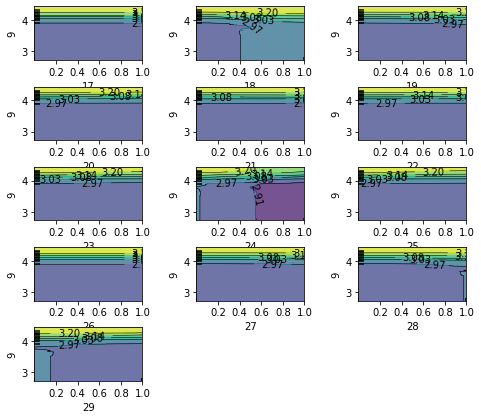

In [129]:
target_features = [(17,9),(18,9),(19,9),(20,9),(21,9),(22,9),(23,9),(24,9),(25,9),(26,9),(27,9),(28,9),(29,9)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


**PHY7**

In [130]:
X_train, X_test, y_train,y_test = data_proc(df,controls,'phy7a_grade_pt')
results_phy7a = evaluate(X_train, X_test, y_train, y_test)
print(X_train.shape)
sample_leaf_options = [5,10,20,25,30,50]
num_features = [10,12,14,16,18]
n_estimators = [50,100,200,400]
best_p = [0,0,0,0]
for leaf_size in sample_leaf_options:
    for nf in num_features:
        for nt in n_estimators:
            model = RandomForestRegressor(n_estimators = nt, oob_score = True, n_jobs = -1, min_samples_leaf = leaf_size,
                                       max_features=nf)
            model.fit(X_train,y_train)
            # The line below is checks the out of bag sample, which is sort of like CV.
            if model.oob_score_>best_p[3]:
                best_p = [leaf_size,nf,nt,model.oob_score_]
print(best_p)
                        
best_p = list(np.int_(best_p[0:3]))
model_rf = RandomForestRegressor(min_samples_leaf=best_p[0], n_estimators=best_p[2], max_features=best_p[1]).fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
print(model_rf.score(X_test,y_test))
                        
perm = PermutationImportance(model_rf, random_state=1).fit(X_train, y_train)
phy_7a_weights = eli5.show_weights(perm, feature_names = X_train.columns.tolist(), top=20)
phy_7a_weights.data = phy_7a_weights.data.replace('background-color:','color:black; background-color:')
phy_7a_weights

(1987, 91)
[5, 16, 400, 0.34755192967925286]
0.3258554735350555


Weight,Feature
0.1197 ± 0.0023,GPA
0.1075 ± 0.0061,PEOPLE_MEAN
0.0909 ± 0.0081,SAT_TOTAL_OFFICIAL_SQ
0.0881 ± 0.0057,APPASSED
0.0738 ± 0.0117,AP_Calculus_AB_5.0
0.0552 ± 0.0040,PLACE_MEAN
0.0419 ± 0.0040,FIRST_GENERATION
0.0389 ± 0.0046,AP_Calculus_AB_0.0
0.0357 ± 0.0042,AP_Chemistry_0.0
0.0265 ± 0.0009,ATOG


 Then, 𝑅2 can make sense: You are impartial, and you wish to punish deviations to over- or underpricing exactly identically. The same applies if you just want to model the relation between the quantities without wishing to predict unobserved values. Now suppose you are working for a consumer/buyer on a tight budget: In this situation, you might want to punish overestimation of the price in a quadratic sense, but underestimation in an 𝐿𝑝 sense, where 1⩽𝑝<2. For 𝑝=1, you would punish in an absolute deviation sense. This can be seen to reflect the goals and intentions of the buyer, and biasing the estimation downward might be of interest for him/her. Conversely, you could flip the thinking if you were to model the price predictions for the seller. Needless to say, any norm 𝐿𝑝 could be chosen to reflect the preferences of the modeller/the agent you model for. You can also punish outside of the 𝐿𝑝 norm entirely, and use constant, exponential, or log loss on one side and a different loss on the other.

In summary, model choice/evaluation cannot be considered independently of the model's aim.

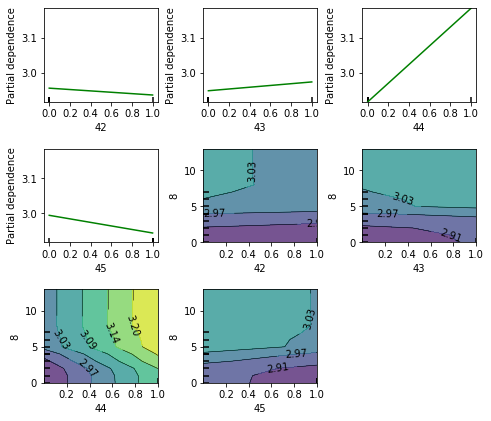

In [131]:
target_features = [42,43, 44, 45, (42,8),(43,8),(44,8),(45,8)]
fig = plot_partial_dependence(model_rf, X_train, target_features,grid_resolution=300)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


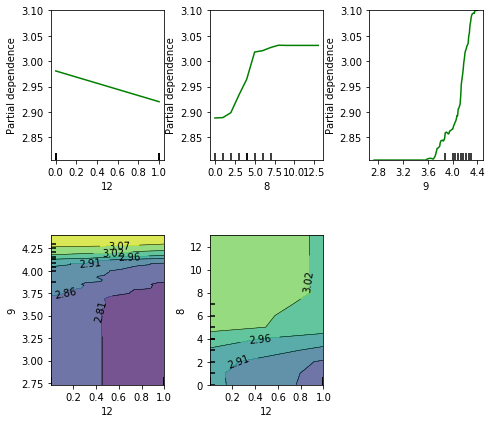

In [132]:
target_features = [12,8,9,(12,9),(12,8)]
fig = plot_partial_dependence(model_rf, X_train, target_features,grid_resolution=300)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5)  # tight_layout causes overlap with suptitle


Marginal effects by ethnicity...

In [133]:
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_MX'])
pd.crosstab(index=df['AP_Calculus_AB_0.0'],columns=df['ETH_AF'])

ETH_AF,0,1
AP_Calculus_AB_0.0,,
0,5155,91
1,12208,666


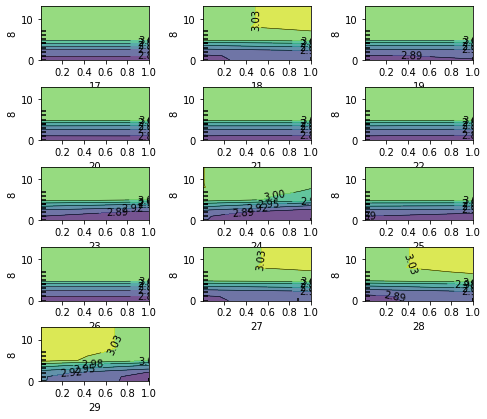

In [134]:
target_features = [(17,8),(18,8),(19,8),(20,8),(21,8),(22,8),(23,8),(24,8),(25,8),(26,8),(27,8),(28,8),(29,8)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


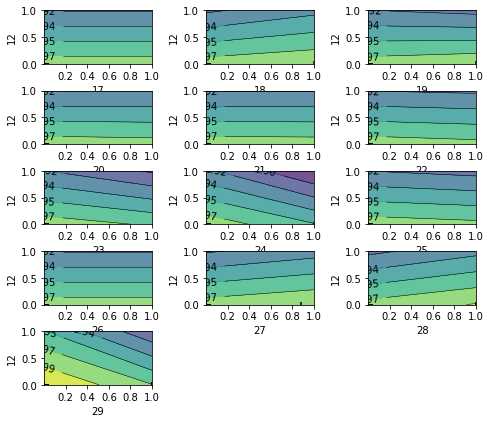

In [135]:
target_features = [(17,12),(18,12),(19,12),(20,12),(21,12),(22,12),(23,12),(24,12),(25,12),(26,12),(27,12),(28,12),(29,12)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


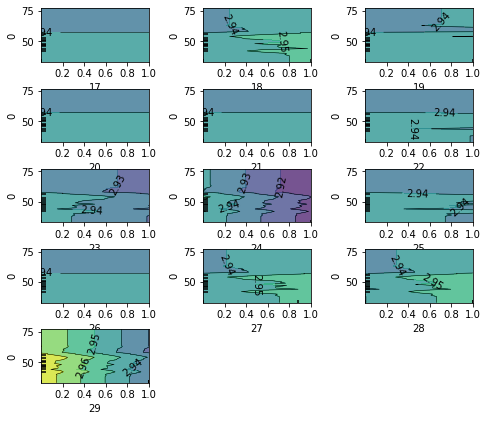

In [136]:
target_features = [(17,0),(18,0),(19,0),(20,0),(21,0),(22,0),(23,0),(24,0),(25,0),(26,0),(27,0),(28,0),(29,0)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle


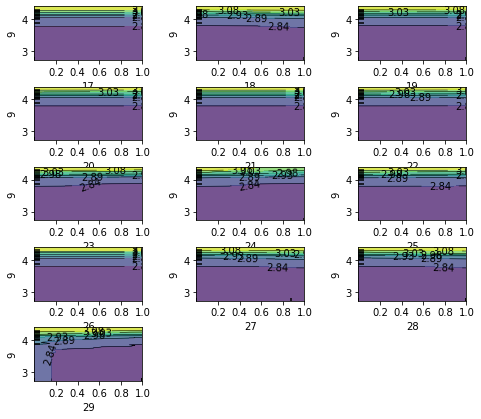

In [137]:
target_features = [(17,9),(18,9),(19,9),(20,9),(21,9),(22,9),(23,9),(24,9),(25,9),(26,9),(27,9),(28,9),(29,9)]
fig = plot_partial_dependence(model_rf, X_train, target_features)
                                    
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4,hspace=0.5,wspace=0.5)  # tight_layout causes overlap with suptitle
